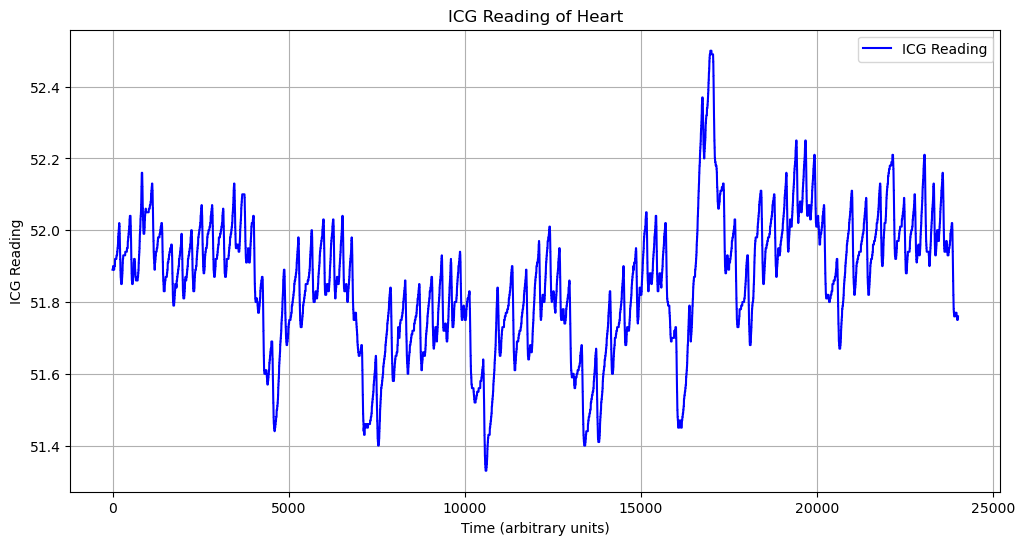

In [4]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt, find_peaks, peak_prominences, peak_widths, freqz
import pywt

# Load the JSON data
with open('ID001.json', 'r') as file:
    data1 = json.load(file)

# Extract the raw data
raw_data1 = np.array(data1["raw_data"][-24000:])

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(raw_data1, label='ICG Reading', color='b')
plt.title('ICG Reading of Heart')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)


# Show the plot
plt.show()

In [5]:
len(raw_data1)


24000

In [6]:
raw_data1

array([51.89, 51.89, 51.89, ..., 51.76, 51.76, 51.76])

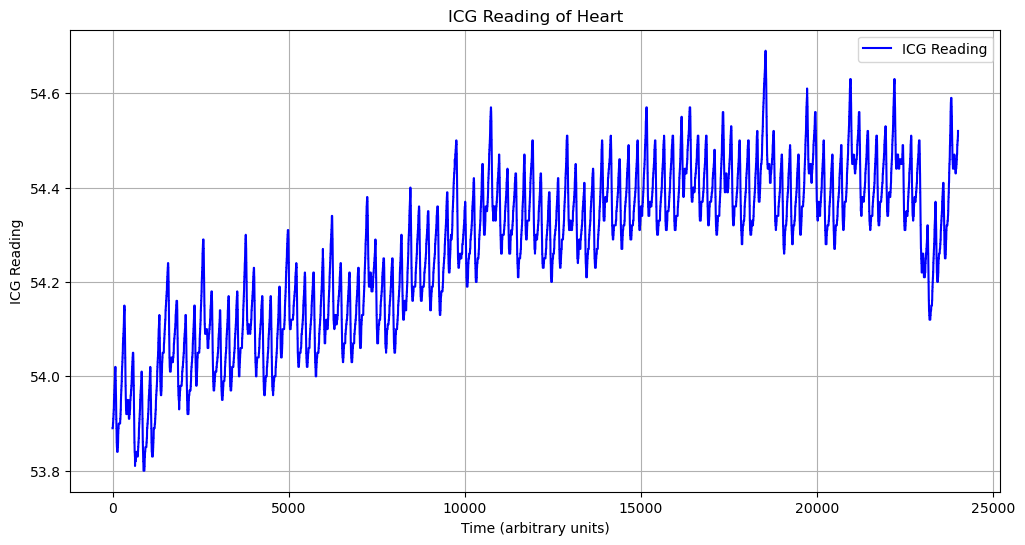

In [7]:
# Load the JSON data
with open('ID002.json', 'r') as file:
    data2 = json.load(file)

# Extract the raw data
raw_data2 = np.array(data2["raw_data"][-24000:])

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(raw_data2, label='ICG Reading', color='b')
plt.title('ICG Reading of Heart')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)


# Show the plot
plt.show()

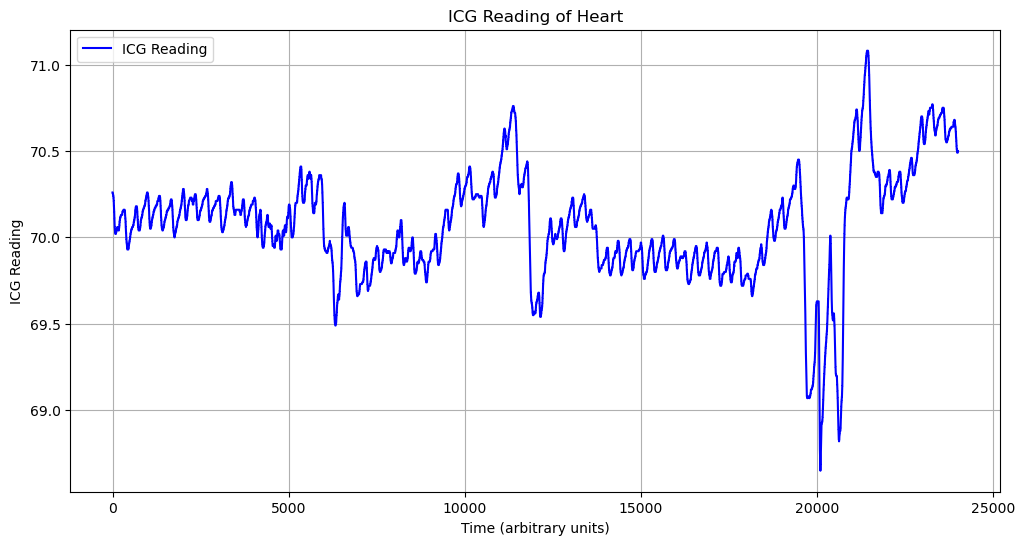

In [8]:
# Load the JSON data
with open('ID003.json', 'r') as file:
    data3 = json.load(file)

# Extract the raw data
raw_data3 = np.array(data3["raw_data"][-24000:])

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(raw_data3, label='ICG Reading', color='b')
plt.title('ICG Reading of Heart')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)


# Show the plot
plt.show()

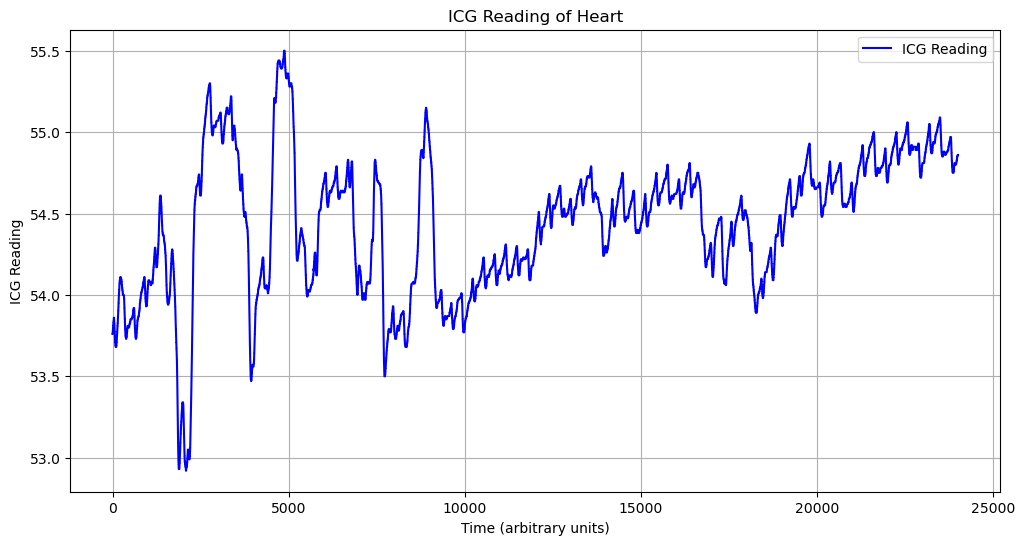

In [9]:
# Load the JSON data
with open('ID004.json', 'r') as file:
    data4 = json.load(file)

# Extract the raw data
raw_data4 = np.array(data4["raw_data"][-24000:])

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(raw_data4, label='ICG Reading', color='b')
plt.title('ICG Reading of Heart')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)


# Show the plot
plt.show()

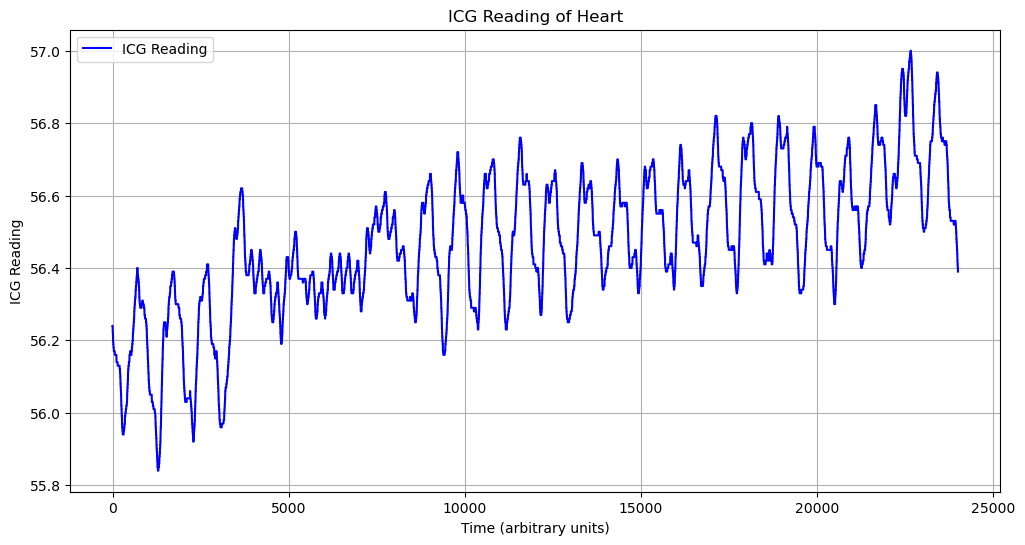

In [10]:
# Load the JSON data
with open('ID005.json', 'r') as file:
    data5 = json.load(file)

# Extract the raw data
raw_data5 = np.array(data5["raw_data"][-24000:])

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(raw_data5, label='ICG Reading', color='b')
plt.title('ICG Reading of Heart')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)


# Show the plot
plt.show()

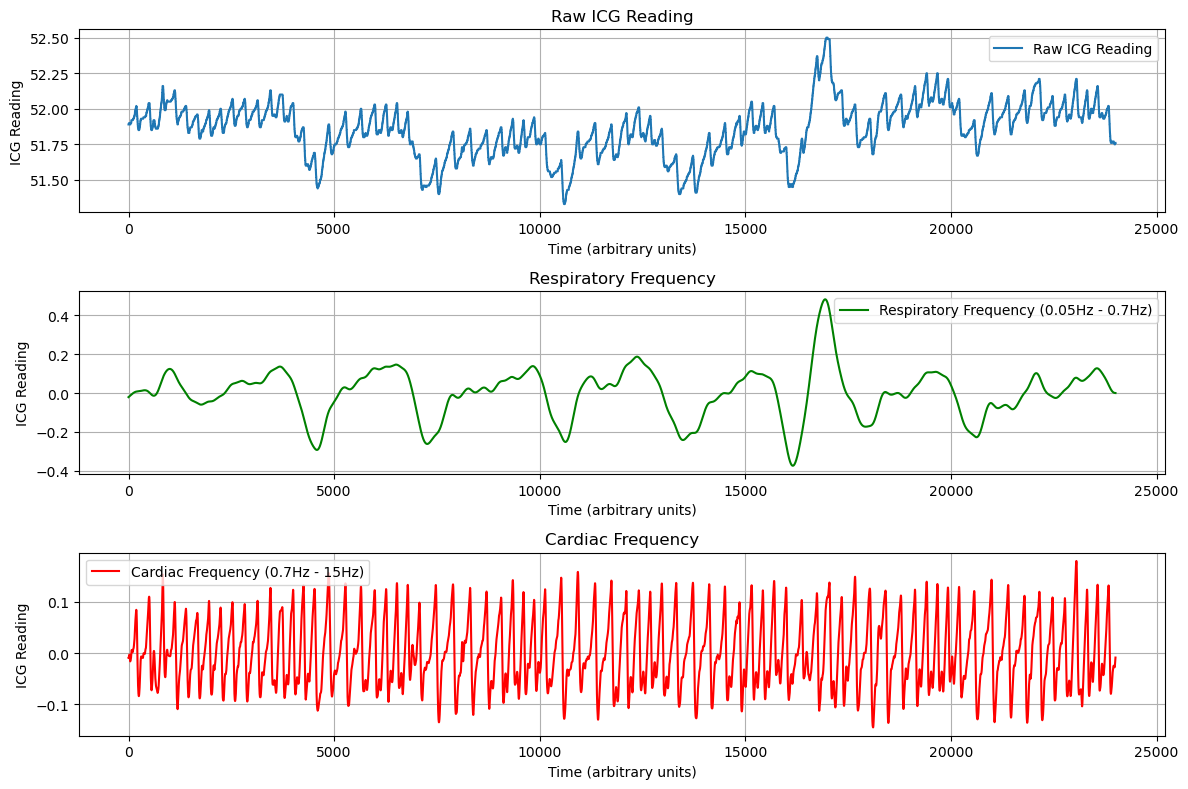

In [11]:
# freqz
# plot b and a 

# Define a function to apply a Butterworth bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=2):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Sampling frequency (assuming the data is sampled at 400 Hz, adjust as necessary)
fs = 400.0

# Apply bandpass filters
respiratory_filtered_data = bandpass_filter(raw_data1, 0.05, 0.7, fs)
cardiac_filtered_data1 = bandpass_filter(raw_data1, 0.7, 15.0, fs)
bCard, aCard = butter_bandpass(0.7, 15.0, fs, order=4)
bResp, aResp = butter_bandpass(0.05, 0.7, fs, order=4)

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(raw_data1, label='Raw ICG Reading')
plt.title('Raw ICG Reading')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(respiratory_filtered_data, label='Respiratory Frequency (0.05Hz - 0.7Hz)', color='g')
plt.title('Respiratory Frequency')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(cardiac_filtered_data1, label='Cardiac Frequency (0.7Hz - 15Hz)', color='r')
plt.title('Cardiac Frequency')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Spectral leckage

In [13]:
type(raw_data1)

numpy.ndarray

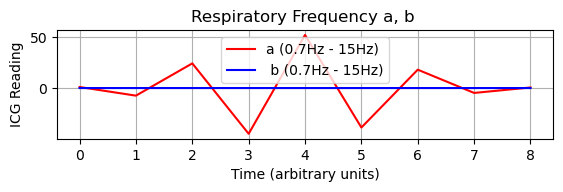

In [10]:
plt.subplot(3, 1, 3)
plt.plot(aCard, label='a (0.7Hz - 15Hz)', color='r')
plt.title('Respiratory Frequency a, b ')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(bCard, label=' b (0.7Hz - 15Hz)', color='b')
plt.title('Respiratory Frequency a, b ')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)


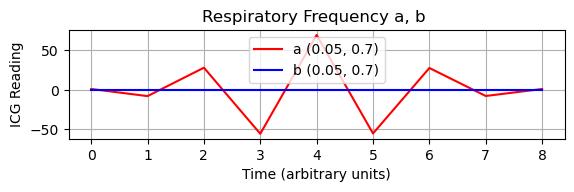

In [11]:
plt.subplot(3, 1, 3)
plt.plot(aResp, label='a (0.05, 0.7)', color='r')
plt.title('Respiratory Frequency a, b ')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(bResp, label='b (0.05, 0.7)', color='b')
plt.title('Respiratory Frequency a, b ')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

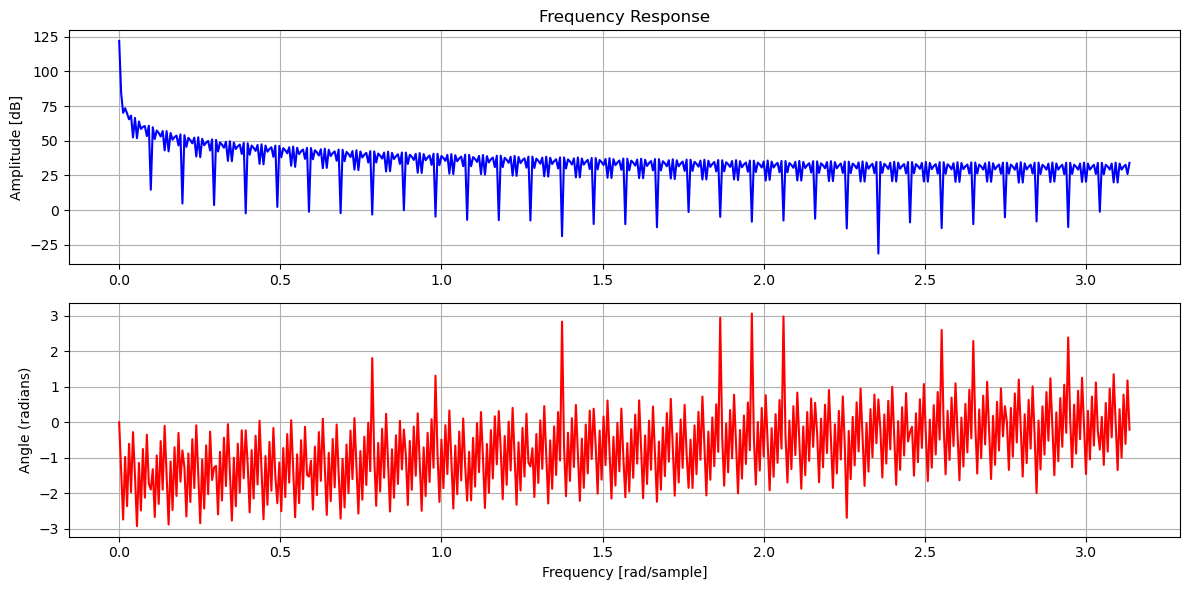

In [13]:
b = np.array(raw_data1)
a = 1  # Assuming a simple FIR filter with a=1

# Calculate frequency response
w, h = freqz(b, a)

# Plot the frequency response
plt.figure(figsize=(12, 6))

# Amplitude response
plt.subplot(2, 1, 1)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]')
plt.title('Frequency Response')
plt.grid()

# Phase response
plt.subplot(2, 1, 2)
plt.plot(w, np.angle(h), 'r')
plt.ylabel('Angle (radians)')
plt.xlabel('Frequency [rad/sample]')
plt.grid()

plt.tight_layout()
plt.show()

In [172]:
b, a = butter_bandpass(0.7, 15.0, fs, order=2)

In [174]:
a

array([ 1.        , -3.67966133,  5.08789696, -3.1360905 ,  0.72786065])

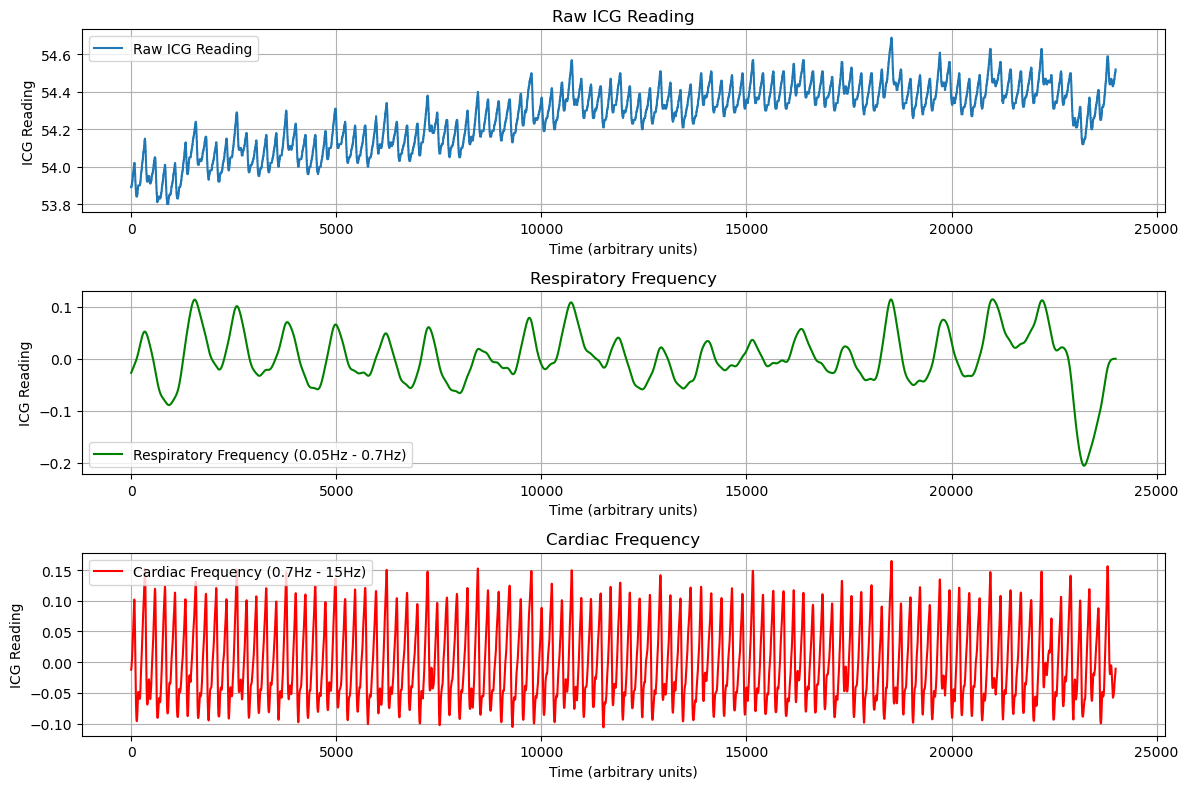

In [14]:
respiratory_filtered_data = bandpass_filter(raw_data2, 0.05, 0.7, fs)
cardiac_filtered_data2 = bandpass_filter(raw_data2, 0.7, 15.0, fs)

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(raw_data2, label='Raw ICG Reading')
plt.title('Raw ICG Reading')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(respiratory_filtered_data, label='Respiratory Frequency (0.05Hz - 0.7Hz)', color='g')
plt.title('Respiratory Frequency')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(cardiac_filtered_data2, label='Cardiac Frequency (0.7Hz - 15Hz)', color='r')
plt.title('Cardiac Frequency')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [49]:
respiratory_filtered_data = bandpass_filter(raw_data3, 0.05, 0.7, fs)
cardiac_filtered_data3 = bandpass_filter(raw_data3, 0.7, 15.0, fs)

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(raw_data3, label='Raw ICG Reading')
plt.title('Raw ICG Reading')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(respiratory_filtered_data, label='Respiratory Frequency (0.05Hz - 0.7Hz)', color='g')
plt.title('Respiratory Frequency')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(cardiac_filtered_data3[], label='Cardiac Frequency (0.7Hz - 15Hz)', color='r')
plt.title('Cardiac Frequency')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1839028765.py, line 24)

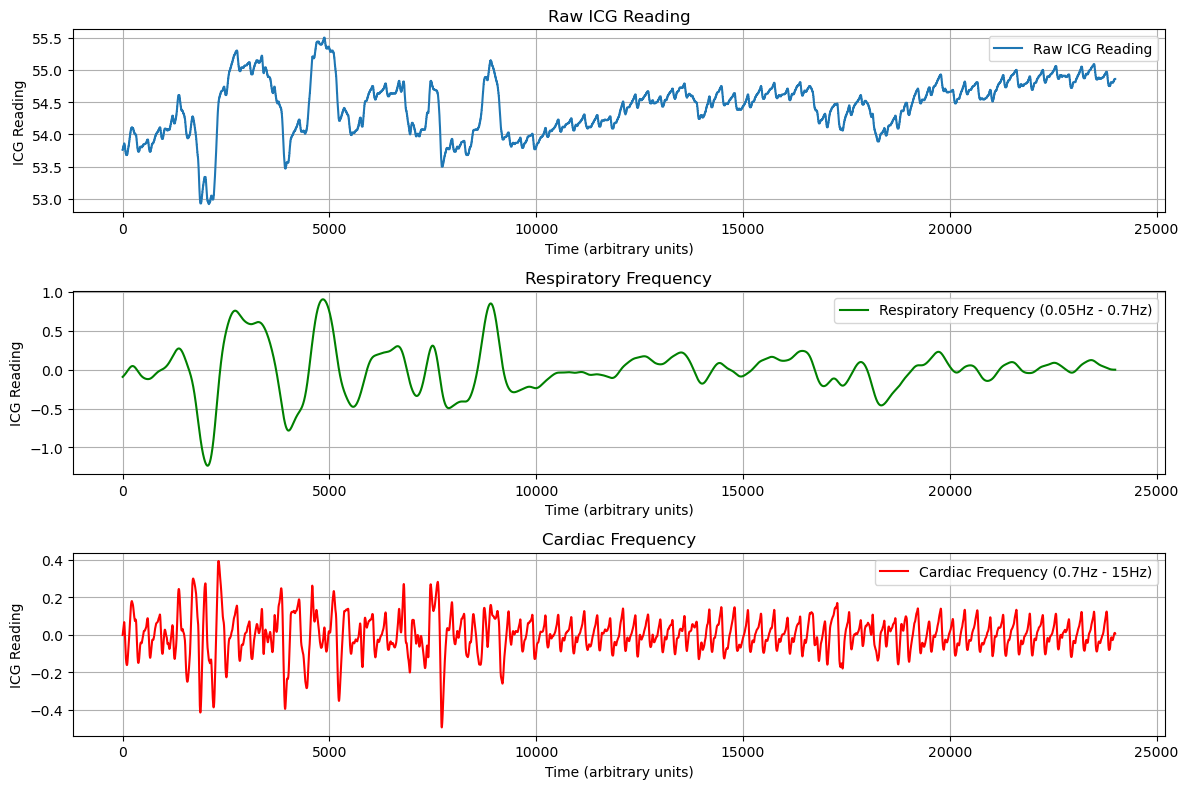

In [16]:
respiratory_filtered_data = bandpass_filter(raw_data4, 0.05, 0.7, fs)
cardiac_filtered_data4 = bandpass_filter(raw_data4, 0.7, 15.0, fs)

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(raw_data4, label='Raw ICG Reading')
plt.title('Raw ICG Reading')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(respiratory_filtered_data, label='Respiratory Frequency (0.05Hz - 0.7Hz)', color='g')
plt.title('Respiratory Frequency')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(cardiac_filtered_data4, label='Cardiac Frequency (0.7Hz - 15Hz)', color='r')
plt.title('Cardiac Frequency')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

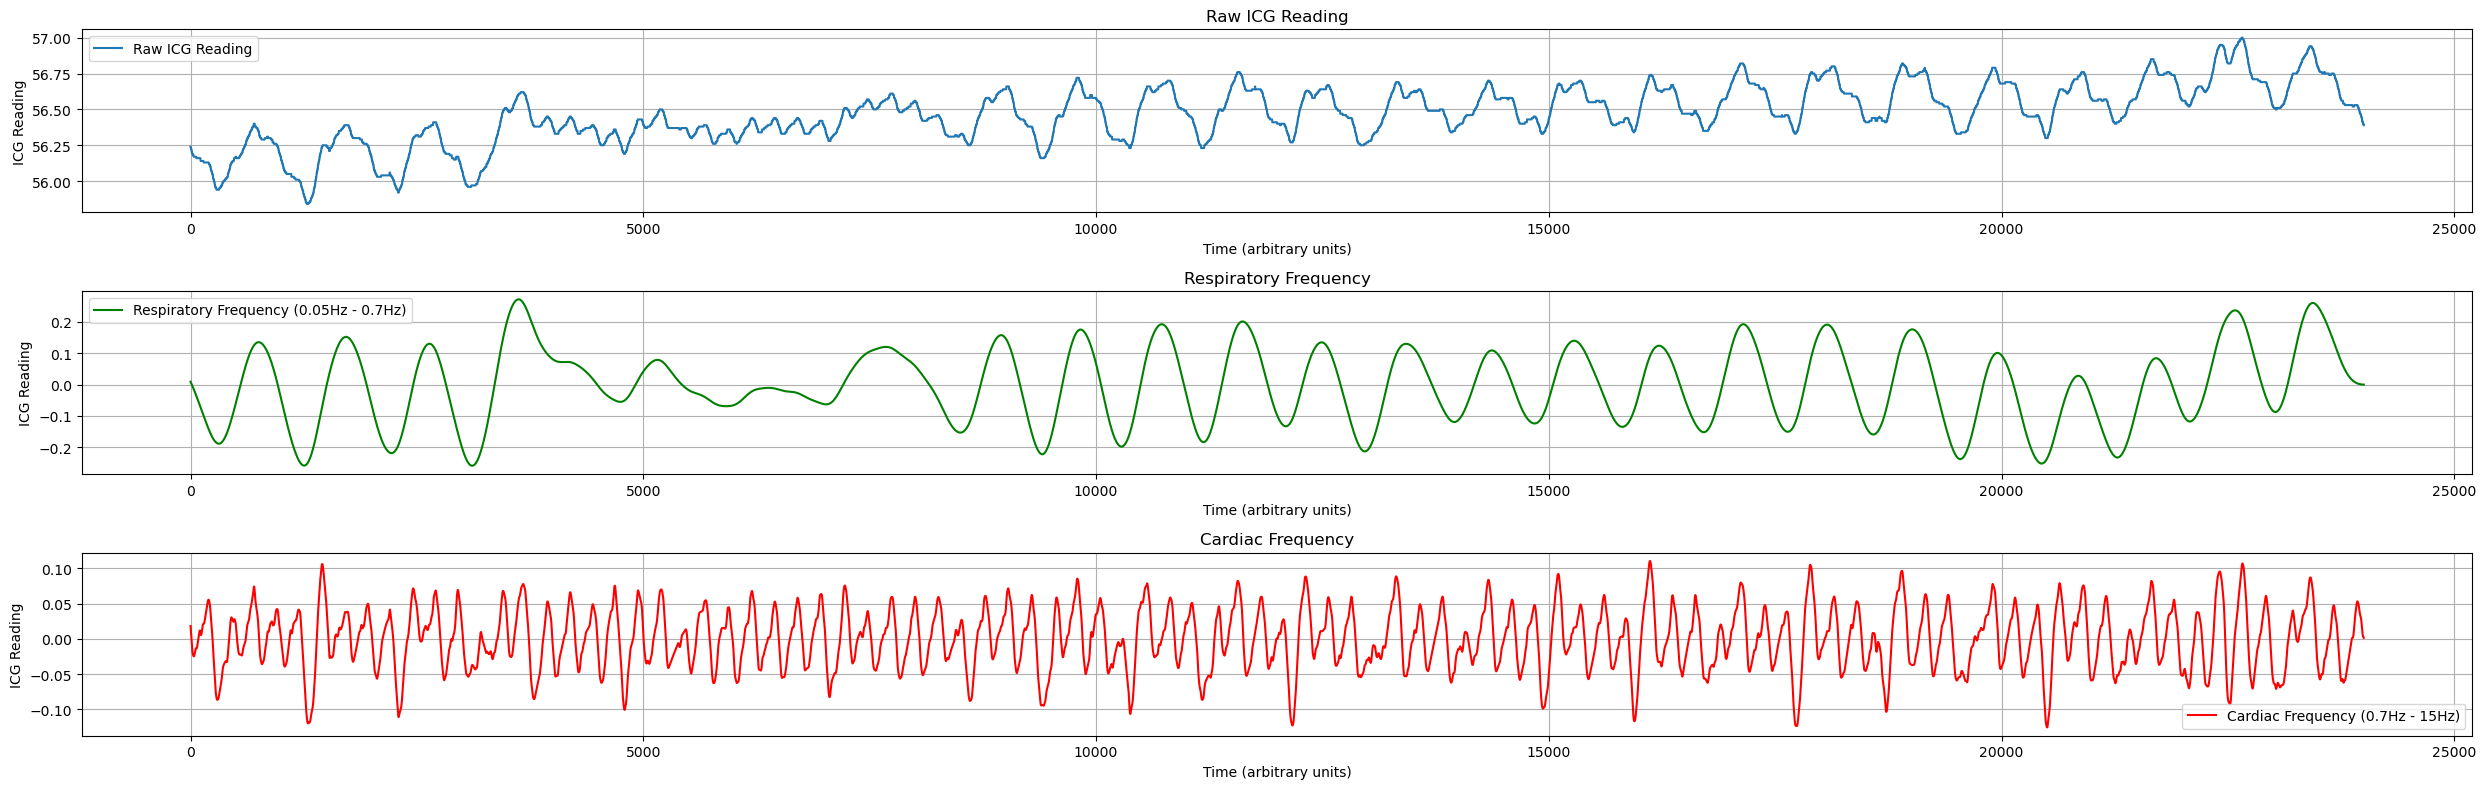

In [53]:
respiratory_filtered_data = bandpass_filter(raw_data5, 0.05, 0.7, fs)
cardiac_filtered_data5 = bandpass_filter(raw_data5, 0.7, 15.0, fs)

# Plot the results
plt.figure(figsize=(25, 8))

plt.subplot(3, 1, 1)
plt.plot(raw_data5, label='Raw ICG Reading')
plt.title('Raw ICG Reading')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(respiratory_filtered_data, label='Respiratory Frequency (0.05Hz - 0.7Hz)', color='g')
plt.title('Respiratory Frequency')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(cardiac_filtered_data5, label='Cardiac Frequency (0.7Hz - 15Hz)', color='r')
plt.title('Cardiac Frequency')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

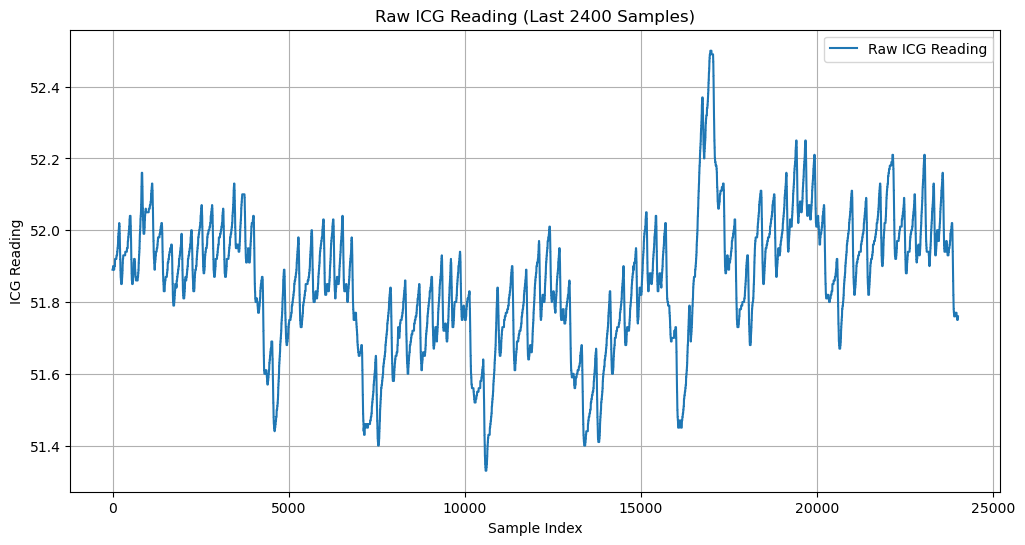

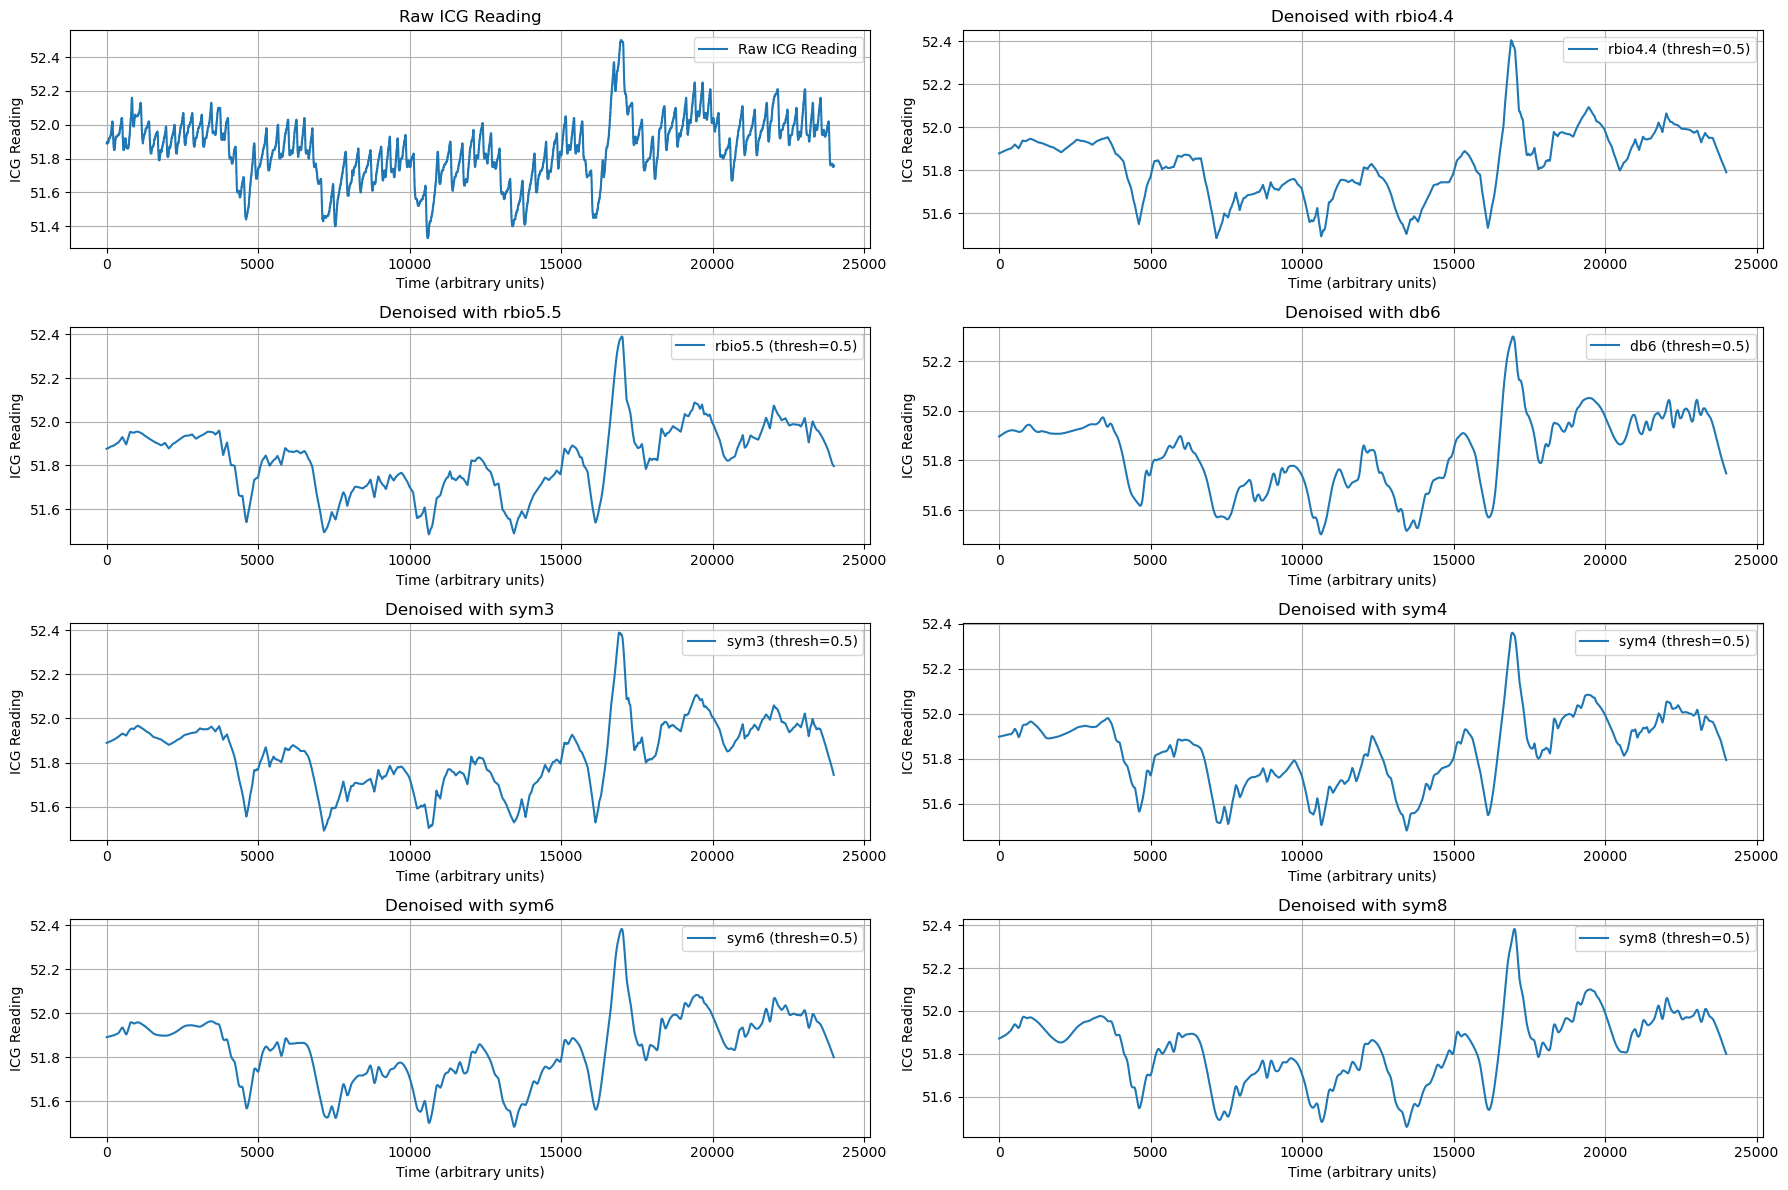

In [21]:

# Plot the raw data to visually inspect it
plt.figure(figsize=(12, 6))
plt.plot(raw_data1, label='Raw ICG Reading')
plt.title('Raw ICG Reading (Last 2400 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)
plt.show()

# Function to perform DWT denoising with adjustable threshold
def dwt_denoise(data, wavelet, level=7, threshold_factor=1.0):
    coeffs = pywt.wavedec(data, wavelet)
    threshold = threshold_factor * np.median(np.abs(coeffs[-level])) / 0.6745 * np.sqrt(2 * np.log(len(data)))
    new_coeffs = list(map(lambda x: pywt.threshold(x, threshold, mode='soft'), coeffs))
    return pywt.waverec(new_coeffs, wavelet)

wavelets = ['rbio4.4', 'rbio5.5', 'db6', 'sym3', 'sym4', 'sym6', 'sym8']

plt.figure(figsize=(18, 12))
plt.subplot(4, 2, 1)
plt.plot(raw_data1, label='Raw ICG Reading')
plt.title('Raw ICG Reading')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

# Test different threshold factors
threshold_factors = [0.5]

for i, wavelet in enumerate(wavelets, 2):
    for j, threshold_factor in enumerate(threshold_factors):
        denoised_data = dwt_denoise(raw_data1, wavelet, threshold_factor=threshold_factor)
        plt.subplot(4, 2, i)
        plt.plot(denoised_data, label=f'{wavelet} (thresh={threshold_factor})')
    plt.title(f'Denoised with {wavelet}')
    plt.xlabel('Time (arbitrary units)')
    plt.ylabel('ICG Reading')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


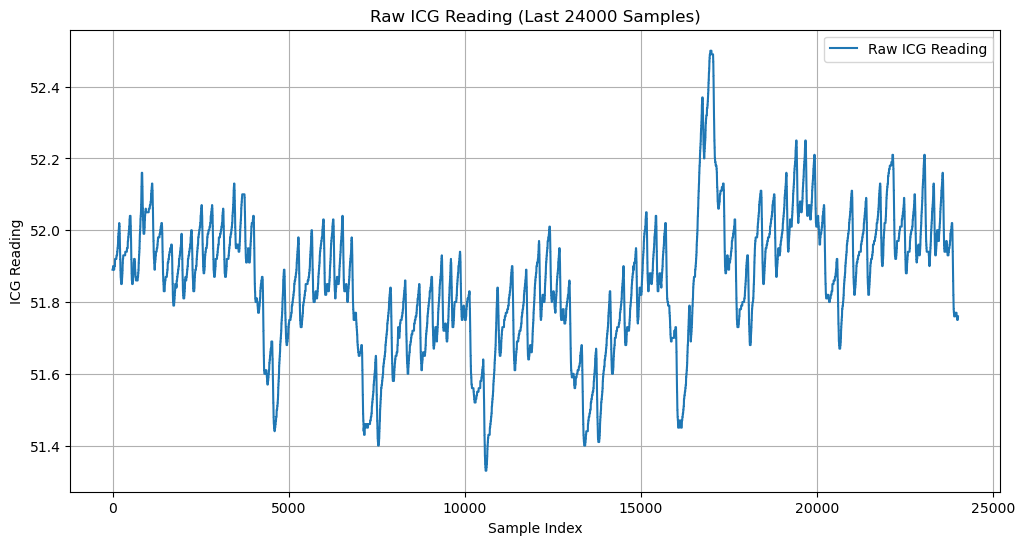

12


/var/folders/3q/2dymrhy53c75l8wxnt3h655w0000gn/T/ipykernel_4194/4256689571.py:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(12,1,i)


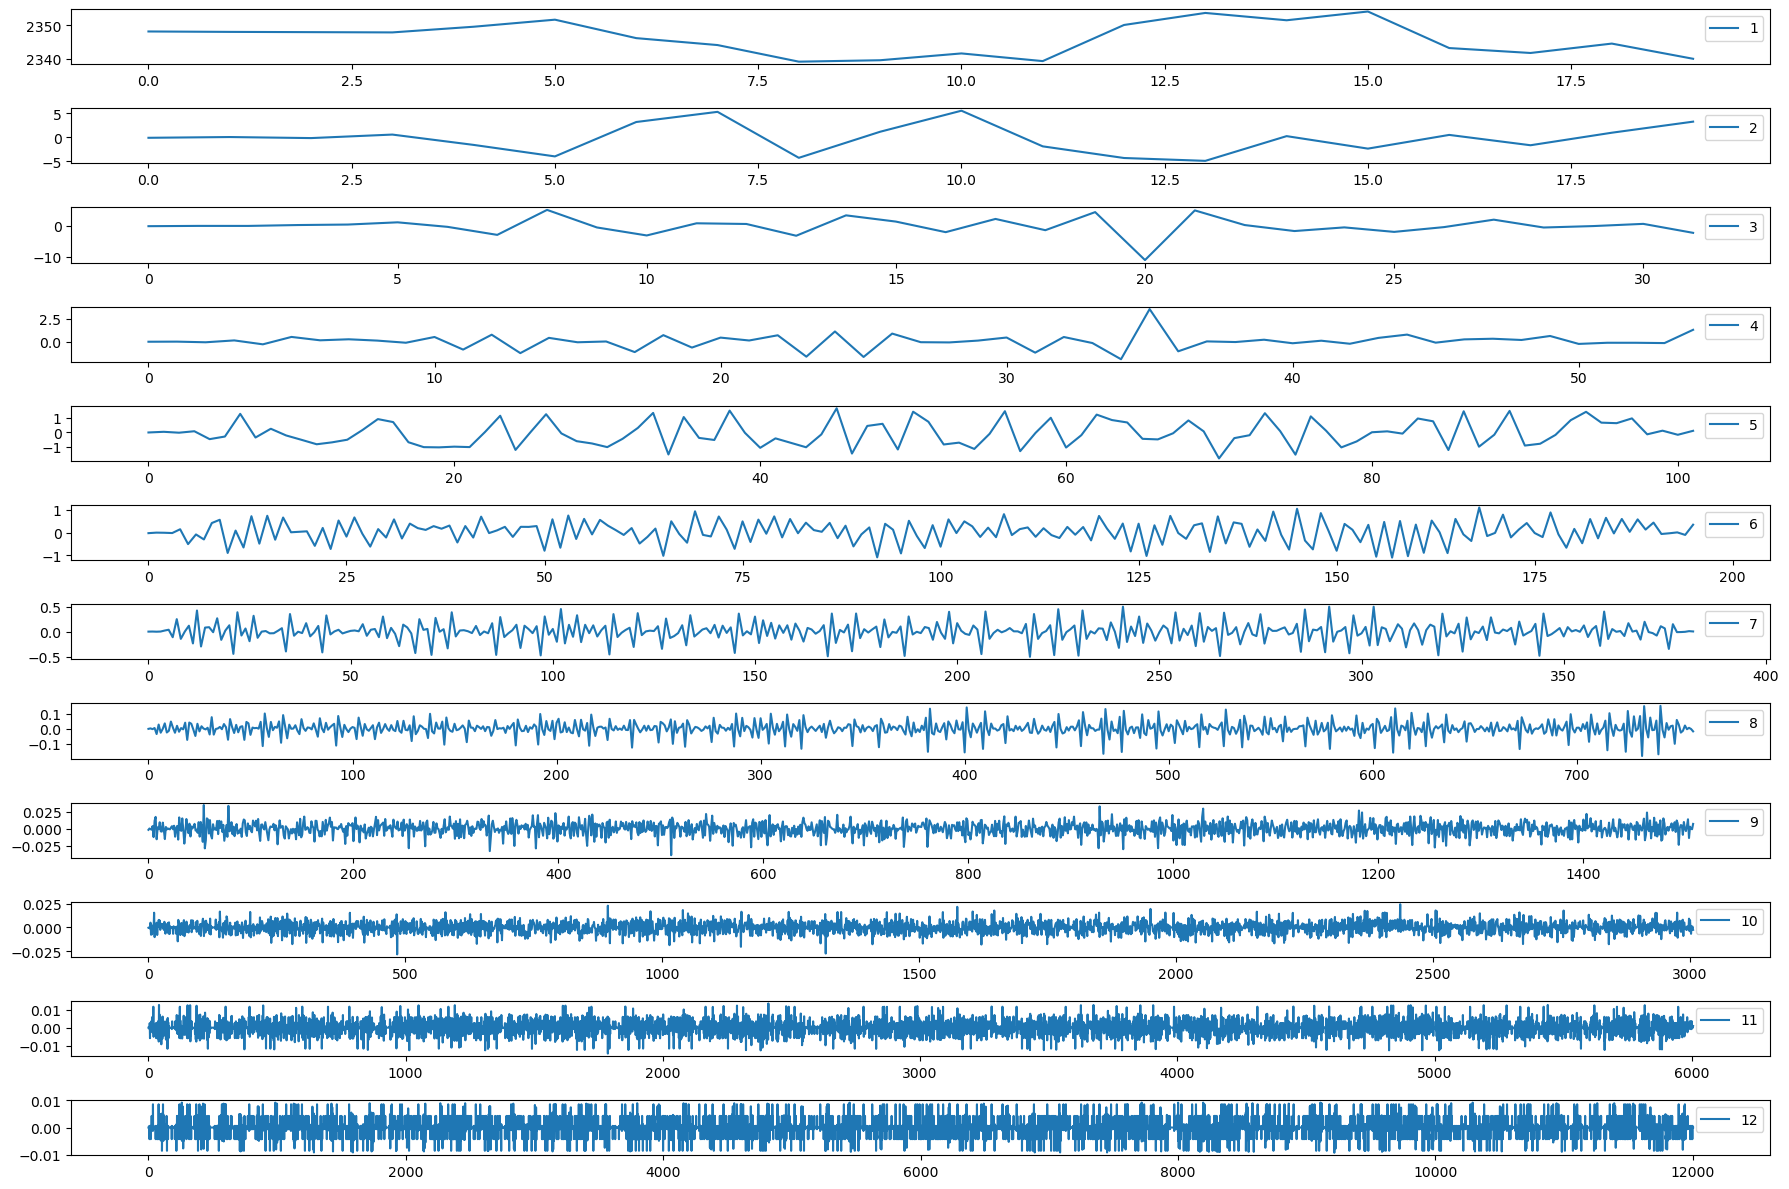

In [19]:
# Try different threshold factor
# Try aggrigation of different levels 


# Plot the raw data to visually inspect it
plt.figure(figsize=(12, 6))
plt.plot(raw_data1, label='Raw ICG Reading')
plt.title('Raw ICG Reading (Last 24000 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)
plt.show()

# Function to perform DWT denoising with adjustable threshold
def dwt_denoise(data, wavelet, level=7, threshold_factor=1.0):
    coeffs = pywt.wavedec(data, wavelet)
#     threshold = threshold_factor * np.median(np.abs(coeffs[-level])) / 0.6745 * np.sqrt(2 * np.log(len(data)))
#     new_coeffs = list(map(lambda x: pywt.threshold(x, threshold, mode='soft'), coeffs))
#     return pywt.waverec(new_coeffs, wavelet
    return coeffs

wavelets = ['rbio4.4', 'rbio5.5', 'db6', 'sym3', 'sym4', 'sym6', 'sym8']

plt.figure(figsize=(18, 12))
plt.subplot(4, 2, 1)
plt.plot(raw_data1, label='Raw ICG Reading')
plt.title('Raw ICG Reading')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

# Test different threshold factors
threshold_factors = [ 1.0 ]

denoised_data = dwt_denoise(raw_data1, 'rbio4.4', threshold_factor=threshold_factor)
# plt.subplot(4, 2, i)
# plt.plot(denoised_data, label=f'{'rbio4.4'} (thresh={threshold_factor})')
# plt.title(f'Denoised with {'rbio4.4'}')
# plt.xlabel('Time (arbitrary units)')
# plt.ylabel('ICG Reading')
# plt.legend()
# plt.grid(True)

# plt.figure(figsize=(18, 12))

print(len(denoised_data))

for i in range(1, len(denoised_data)+1):
    plt.subplot(12,1,i)
    plt.plot(denoised_data[i-1], label=i)
    plt.legend()
    

# for i, wavelet in enumerate(wavelets, 2):
#     for j, threshold_factor in enumerate(threshold_factors):
#         denoised_data = dwt_denoise(raw_data1, wavelet, threshold_factor=threshold_factor)
#         plt.subplot(4, 2, i)
#         plt.plot(denoised_data, label=f'{wavelet} (thresh={threshold_factor})')
#     plt.title(f'Denoised with {wavelet}')
#     plt.xlabel('Time (arbitrary units)')
#     plt.ylabel('ICG Reading')
#     plt.legend()
#     plt.grid(True)

plt.tight_layout()
plt.show()

# niquist frequency 

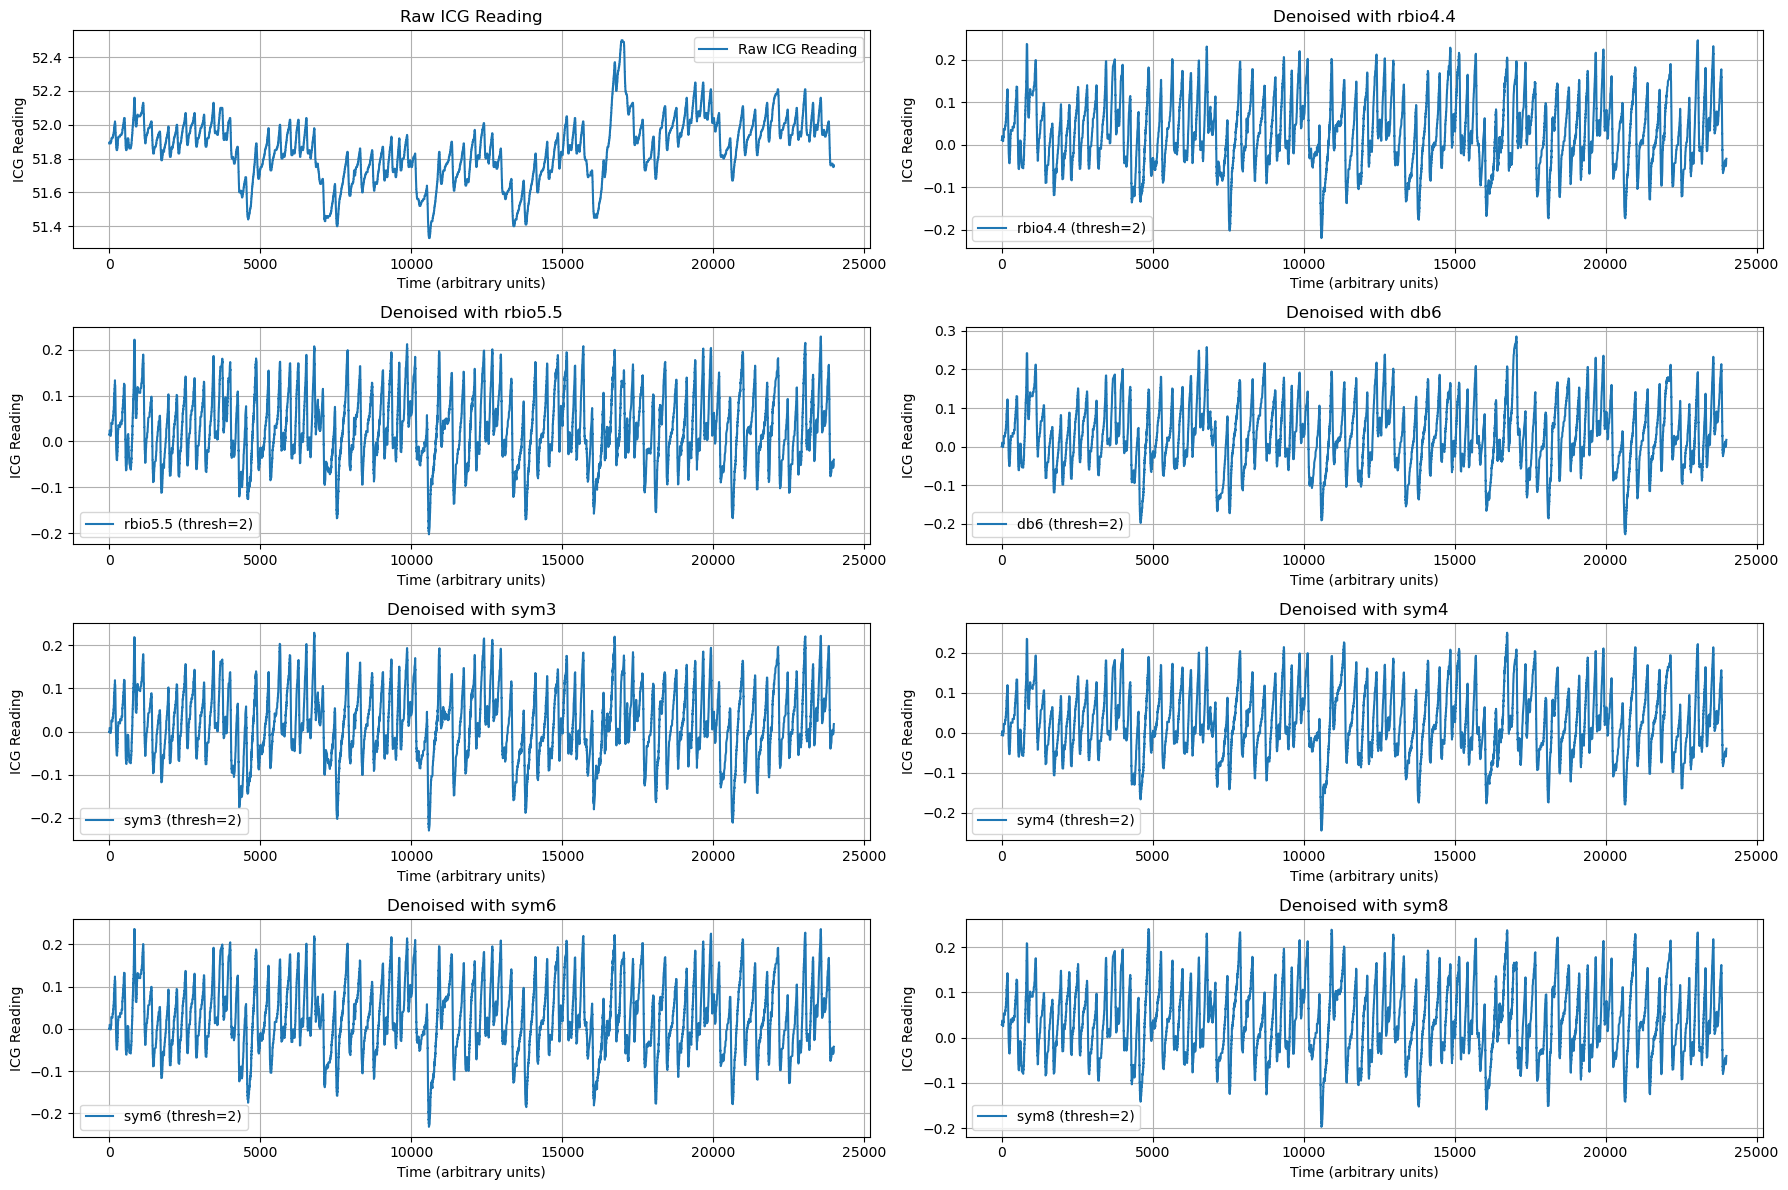

In [23]:
# plt.figure(figsize=(12, 6))
# plt.plot(raw_data1, label='Raw ICG Reading')
# plt.title('Raw ICG Reading (Last 2400 Samples)')
# plt.xlabel('Sample Index')
# plt.ylabel('ICG Reading')
# plt.legend()
# plt.grid(True)
# plt.show()

# Function to perform DWT denoising with adjustable threshold
def dwt_denoise(data, wavelet, level=1, threshold_factor=1.0):
    coeffs = pywt.wavedec(data, wavelet)
    threshold = threshold_factor * np.median(np.abs(coeffs[-6])) / 0.6745 * np.sqrt(2 * np.log(len(data)))
    new_coeffs = list(map(lambda x: pywt.threshold(x, threshold, mode='soft'), coeffs))
    return pywt.waverec(new_coeffs, wavelet)

wavelets = ['rbio4.4', 'rbio5.5', 'db6', 'sym3', 'sym4', 'sym6', 'sym8']

plt.figure(figsize=(18, 12))
plt.subplot(4, 2, 1)
plt.plot(raw_data1, label='Raw ICG Reading')
plt.title('Raw ICG Reading')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

# Test different threshold factors

threshold_factors = [ 2]

for i, wavelet in enumerate(wavelets, 2):
    for j, threshold_factor in enumerate(threshold_factors):
        denoised_data = dwt_denoise(raw_data1, wavelet, threshold_factor=threshold_factor)
        plt.subplot(4, 2, i)
        plt.plot((raw_data1-denoised_data), label=f'{wavelet} (thresh={threshold_factor})')
    plt.title(f'Denoised with {wavelet}')
    plt.xlabel('Time (arbitrary units)')
    plt.ylabel('ICG Reading')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


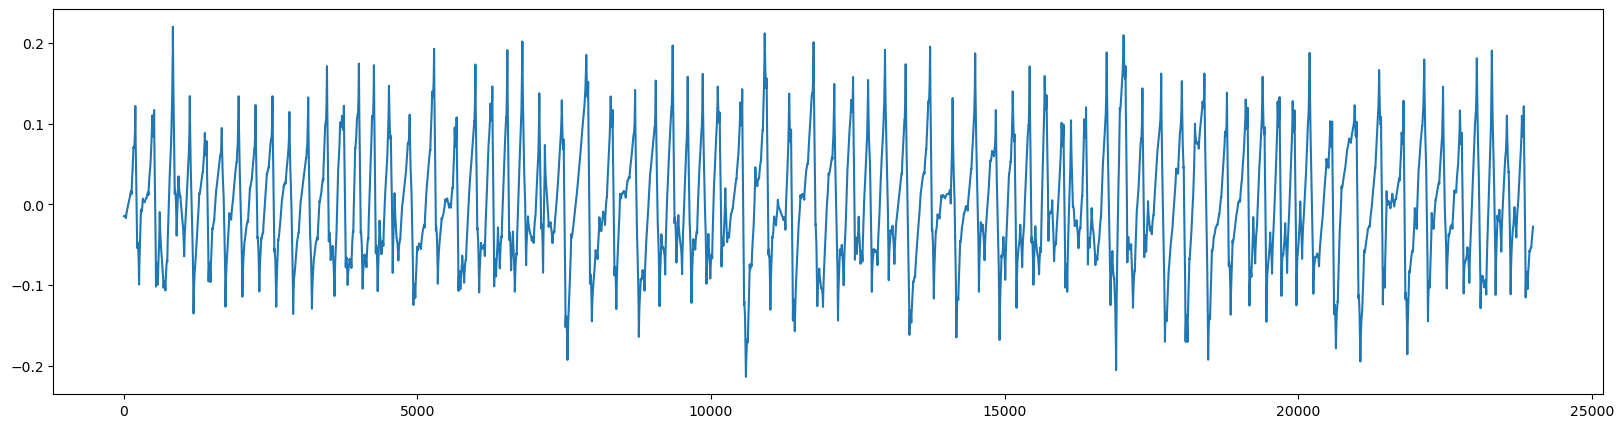

In [161]:
coeffs = pywt.wavedec(raw_data1,'coif1', level=11)

for i in range(len(coeffs)):
    if i not in [4,5,6]:  
        coeffs[i] = np.zeros_like(coeffs[i])            

y = pywt.waverec(coeffs, 'coif1')

plt.figure(figsize=(20,5))
plt.plot(y)

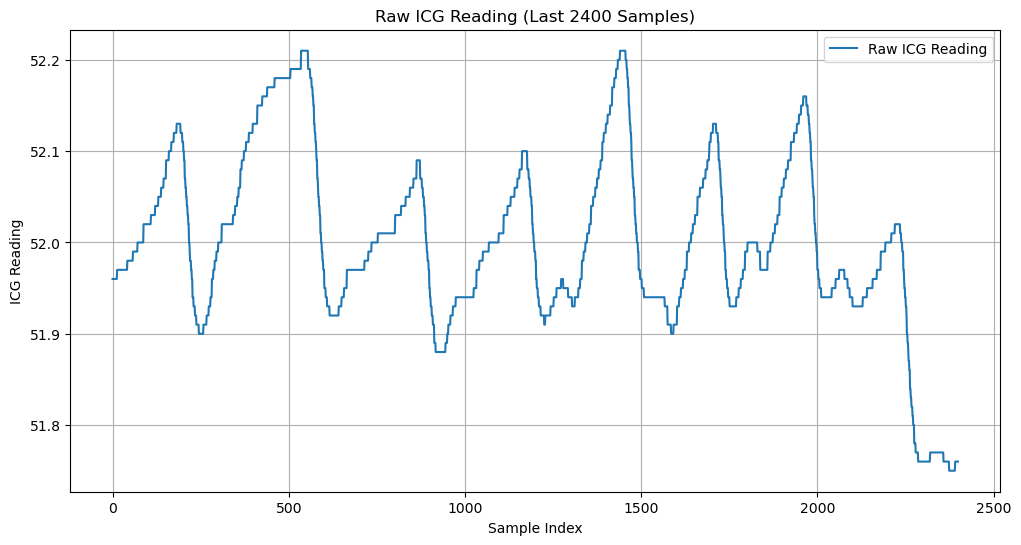

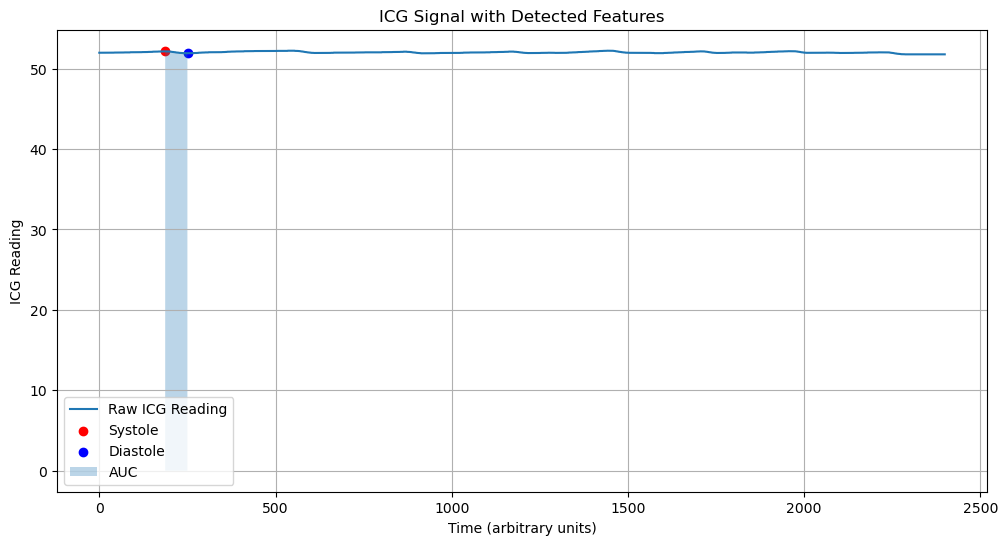

Systole Index: 187, Value: 52.13
Diastole Index: 251, Value: 51.9
Dicrotic Notch Index: None, Value: N/A
Area Under the Curve (AUC): 3276.3950000000004


In [218]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences, peak_widths

# Load the JSON data
with open('ID001.json', 'r') as file:
    data = json.load(file)

# Extract the last 2400 readings from the raw data
raw_data = np.array(data["raw_data"][-2400:])

# Plot the raw data to visually inspect it
plt.figure(figsize=(12, 6))
plt.plot(raw_data, label='Raw ICG Reading')
plt.title('Raw ICG Reading (Last 2400 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)
plt.show()

# Function to detect systole, diastole, and dicrotic notch
def detect_features(data, fs=1000):
    # Detect all peaks with lower prominence to ensure detection
    peaks, _ = find_peaks(data, prominence=0.05)
    # Detect all valleys (invert the signal to find valleys as peaks)
    valleys, _ = find_peaks(-data, prominence=0.05)

    if len(peaks) == 0 or len(valleys) == 0:
        print("No peaks or valleys detected. Adjust prominence or check data.")
        return None, None, None

    # Identify systole (first major peak in the cycle)
    systole = peaks[0]

    # Identify diastole (first major valley after systole)
    diastole_candidates = valleys[valleys > systole]
    if len(diastole_candidates) > 0:
        diastole = diastole_candidates[0]
    else:
        diastole = None

    # Identify dicrotic notch (small peak after systole but before diastole)
    dicrotic_candidates = peaks[(peaks > systole) & (peaks < diastole)]
    if len(dicrotic_candidates) > 0:
        dicrotic_notch = dicrotic_candidates[0]
    else:
        dicrotic_notch = None

    return systole, diastole, dicrotic_notch

# Function to calculate the area under the curve between systole and diastole
def calculate_auc(data, systole, diastole):
    if systole is not None and diastole is not None:
        auc = np.trapz(data[systole:diastole], dx=1.0)
        return auc
    return None

# Sampling frequency (assuming the data is sampled at 400 Hz, adjust as necessary)
fs = 400.0

# Detect features in the raw data
systole, diastole, dicrotic_notch = detect_features(raw_data, fs)

# If features are detected, calculate the AUC and plot the results
if systole is not None and diastole is not None:
    auc = calculate_auc(raw_data, systole, diastole)

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(raw_data, label='Raw ICG Reading')
    plt.scatter([systole], [raw_data[systole]], color='red', label='Systole')
    plt.scatter([diastole], [raw_data[diastole]], color='blue', label='Diastole')
    if dicrotic_notch is not None:
        plt.scatter([dicrotic_notch], [raw_data[dicrotic_notch]], color='green', label='Dicrotic Notch')
    plt.fill_between(np.arange(systole, diastole), raw_data[systole:diastole], alpha=0.3, label='AUC')
    plt.title('ICG Signal with Detected Features')
    plt.xlabel('Time (arbitrary units)')
    plt.ylabel('ICG Reading')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print the extracted features
    print(f"Systole Index: {systole}, Value: {raw_data[systole]}")
    print(f"Diastole Index: {diastole}, Value: {raw_data[diastole]}")
    print(f"Dicrotic Notch Index: {dicrotic_notch}, Value: {raw_data[dicrotic_notch] if dicrotic_notch is not None else 'N/A'}")
    print(f"Area Under the Curve (AUC): {auc}")
else:
    print("Features could not be detected in the raw data.")


In [ ]:
peaks, _ = find_peaks(cardiac_filtered_data1, prominence=0.05)

In [105]:
peaks

array([  189,   502,   618,   834,  1124,  1396,  1673,  1958,  2240,
        2528,  2825,  3138,  3452,  3739,  4002,  4255,  4522,  4867,
        5274,  5652,  5987,  6264,  6527,  6791,  7075,  7472,  7890,
        8306,  8706,  9059,  9345,  9604,  9863, 10130, 10521, 10926,
       11344, 11741, 12103, 12408, 12686, 12968, 13317, 13724, 14119,
       14502, 14857, 15152, 15425, 15699, 15990, 16370, 16739, 17043,
       17342, 17666, 18025, 18407, 18782, 19124, 19409, 19670, 19926,
       20196, 20564, 20986, 21390, 21786, 22146, 22468, 22769, 23049,
       23308, 23564, 23831])

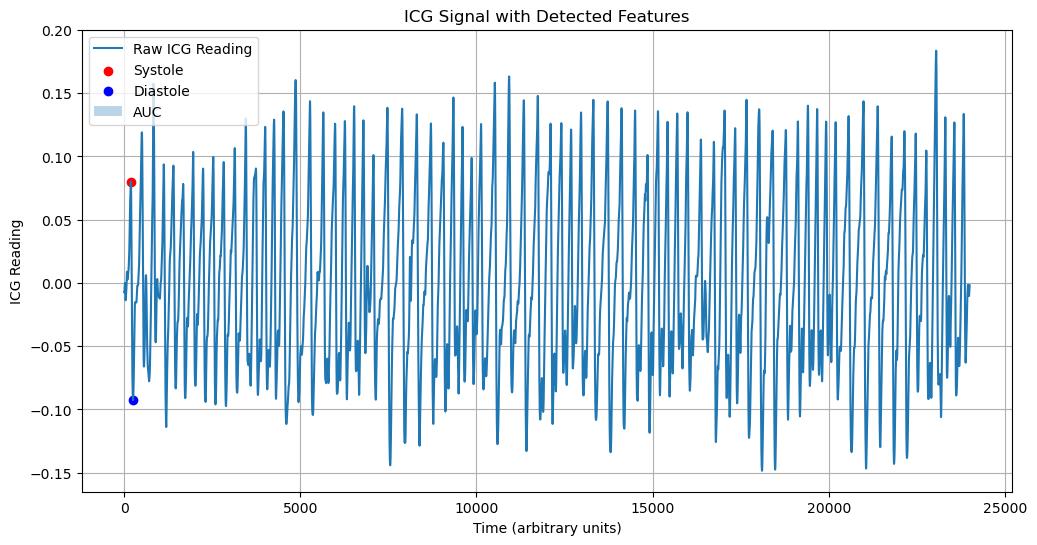

Systole Index: 189, Value: 0.0800986519471003
Diastole Index: 251, Value: -0.09260615984142684
Dicrotic Notch Index: None, Value: N/A
Area Under the Curve (AUC): -0.9027817340145239


In [110]:
def detect_features(data, fs=1000):
    # Detect all peaks with lower prominence to ensure detection
    peaks, _ = find_peaks(data, prominence=0.05)
    # Detect all valleys (invert the signal to find valleys as peaks)
    valleys, _ = find_peaks(-data, prominence=0.05)

    if len(peaks) == 0 or len(valleys) == 0:
        print("No peaks or valleys detected. Adjust prominence or check data.")
        return None, None, None

    # Identify systole (first major peak in the cycle)
    systole = peaks[0]

    # Identify diastole (first major valley after systole)
    diastole_candidates = valleys[valleys > systole]
    if len(diastole_candidates) > 0:
        diastole = diastole_candidates[0]
    else:
        diastole = None

    # Identify dicrotic notch (small peak after systole but before diastole)
    dicrotic_candidates = peaks[(peaks > systole) & (peaks < diastole)]
    if len(dicrotic_candidates) > 0:
        dicrotic_notch = dicrotic_candidates[0]
    else:
        dicrotic_notch = None

    return systole, diastole, dicrotic_notch

# Function to calculate the area under the curve between systole and diastole
def calculate_auc(data, systole, diastole):
    if systole is not None and diastole is not None:
        auc = np.trapz(data[systole:diastole], dx=1.0)
        return auc
    return None

# Sampling frequency (assuming the data is sampled at 400 Hz, adjust as necessary)
fs = 400.0

# Detect features in the raw data
systole, diastole, dicrotic_notch = detect_features(cardiac_filtered_data1, fs)

# If features are detected, calculate the AUC and plot the results
if systole is not None and diastole is not None:
    auc = calculate_auc(cardiac_filtered_data1, systole, diastole)

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(cardiac_filtered_data1, label='Raw ICG Reading')
    plt.scatter([systole], [cardiac_filtered_data1[systole]], color='red', label='Systole')
    plt.scatter([diastole], [cardiac_filtered_data1[diastole]], color='blue', label='Diastole')
    if dicrotic_notch is not None:
        plt.scatter([dicrotic_notch], [cardiac_filtered_data1[dicrotic_notch]], color='green', label='Dicrotic Notch')
    plt.fill_between(np.arange(systole, diastole), cardiac_filtered_data1[systole:diastole], alpha=0.3, label='AUC')
    plt.title('ICG Signal with Detected Features')
    plt.xlabel('Time (arbitrary units)')
    plt.ylabel('ICG Reading')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print the extracted features
    print(f"Systole Index: {systole}, Value: {cardiac_filtered_data1[systole]}")
    print(f"Diastole Index: {diastole}, Value: {cardiac_filtered_data1[diastole]}")
    print(f"Dicrotic Notch Index: {dicrotic_notch}, Value: {cardiac_filtered_data1[dicrotic_notch] if dicrotic_notch is not None else 'N/A'}")
    print(f"Area Under the Curve (AUC): {auc}")
else:
    print("Features could not be detected in the raw data.")


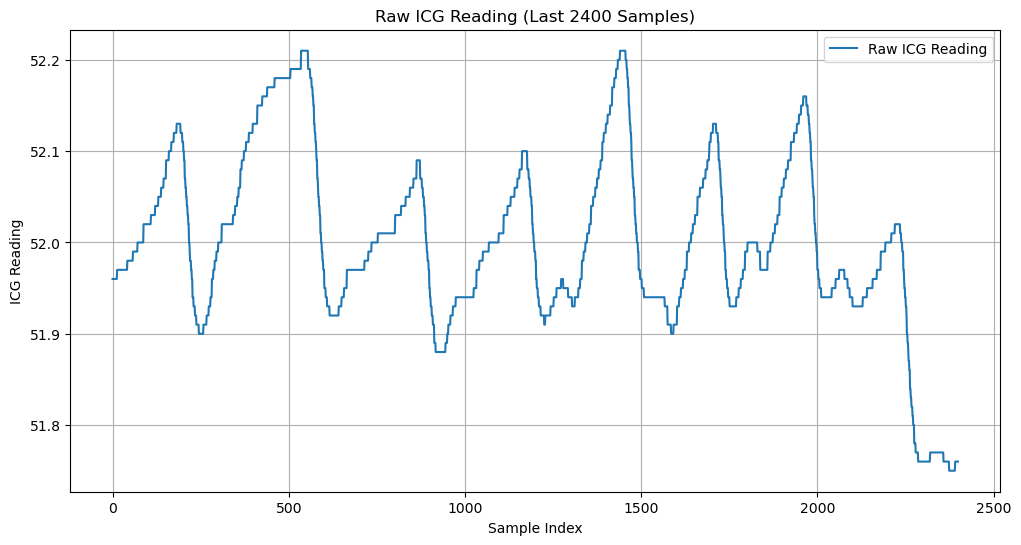

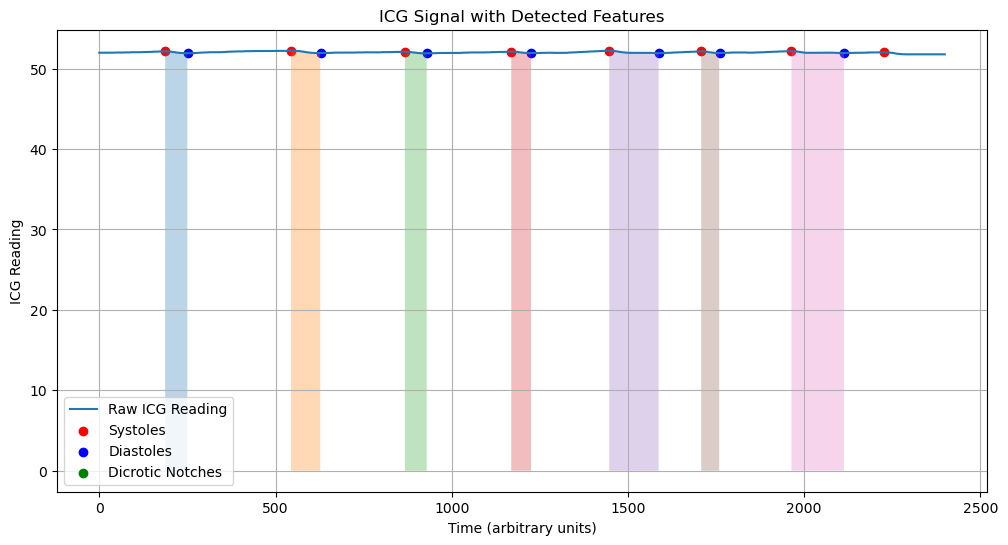

In [114]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load the JSON data
with open('ID001.json', 'r') as file:
    data = json.load(file)

# Extract the last 2400 readings from the raw data
raw_data = np.array(data["raw_data"][-2400:])

# Plot the raw data to visually inspect it
plt.figure(figsize=(12, 6))
plt.plot(raw_data, label='Raw ICG Reading')
plt.title('Raw ICG Reading (Last 2400 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)
plt.show()

# Function to detect systole, diastole, and dicrotic notch
def detect_all_features(data, fs=1000):
    # Detect all peaks with lower prominence to ensure detection
    peaks, _ = find_peaks(data, prominence=0.05)
    # Detect all valleys (invert the signal to find valleys as peaks)
    valleys, _ = find_peaks(-data, prominence=0.05)

    if len(peaks) == 0 or len(valleys) == 0:
        print("No peaks or valleys detected. Adjust prominence or check data.")
        return [], [], []

    systoles = []
    diastoles = []
    dicrotic_notches = []

    for peak in peaks:
        # Identify systole (major peak)
        systoles.append(peak)

        # Identify diastole (first major valley after systole)
        diastole_candidates = valleys[valleys > peak]
        if len(diastole_candidates) > 0:
            diastole = diastole_candidates[0]
            diastoles.append(diastole)

            # Identify dicrotic notch (small peak after systole but before diastole)
            dicrotic_candidates = peaks[(peaks > peak) & (peaks < diastole)]
            if len(dicrotic_candidates) > 0:
                dicrotic_notch = dicrotic_candidates[0]
                dicrotic_notches.append(dicrotic_notch)

    return systoles, diastoles, dicrotic_notches

# Function to calculate the area under the curve between systole and diastole
def calculate_auc(data, systole, diastole):
    if systole is not None and diastole is not None:
        auc = np.trapz(data[systole:diastole], dx=1.0)
        return auc
    return None

# Sampling frequency (assuming the data is sampled at 400 Hz, adjust as necessary)
fs = 400.0

# Detect features in the raw data
systoles, diastoles, dicrotic_notches = detect_all_features(raw_data, fs)

# If features are detected, calculate the AUC and plot the results
if len(systoles) > 0 and len(diastoles) > 0:
    aucs = [calculate_auc(raw_data, systole, diastole) for systole, diastole in zip(systoles, diastoles)]

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(raw_data, label='Raw ICG Reading')
    plt.scatter(systoles, raw_data[systoles], color='red', label='Systoles')
    plt.scatter(diastoles, raw_data[diastoles], color='blue', label='Diastoles')
    plt.scatter(dicrotic_notches, raw_data[dicrotic_notches], color='green', label='Dicrotic Notches')

    for systole, diastole in zip(systoles, diastoles):
        plt.fill_between(np.arange(systole, diastole), raw_data[systole:diastole], alpha=0.3)

    plt.title('ICG Signal with Detected Features')
    plt.xlabel('Time (arbitrary units)')
    plt.ylabel('ICG Reading')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print the extracted features
    for i, (systole, diastole, dicrotic_notch, auc) in enumerate(zip(systoles, diastoles, dicrotic_notches, aucs)):
        print(f"Cycle {i+1}:")
        print(f"  Systole Index: {systole}, Value: {raw_data[systole]}")
        print(f"  Diastole Index: {diastole}, Value: {raw_data[diastole]}")
        print(f"  Dicrotic Notch Index: {dicrotic_notch}, Value: {raw_data[dicrotic_notch] if dicrotic_notch is not None else 'N/A'}")
        print(f"  Area Under the Curve (AUC): {auc}")
else:
    print("Features could not be detected in the raw data.")


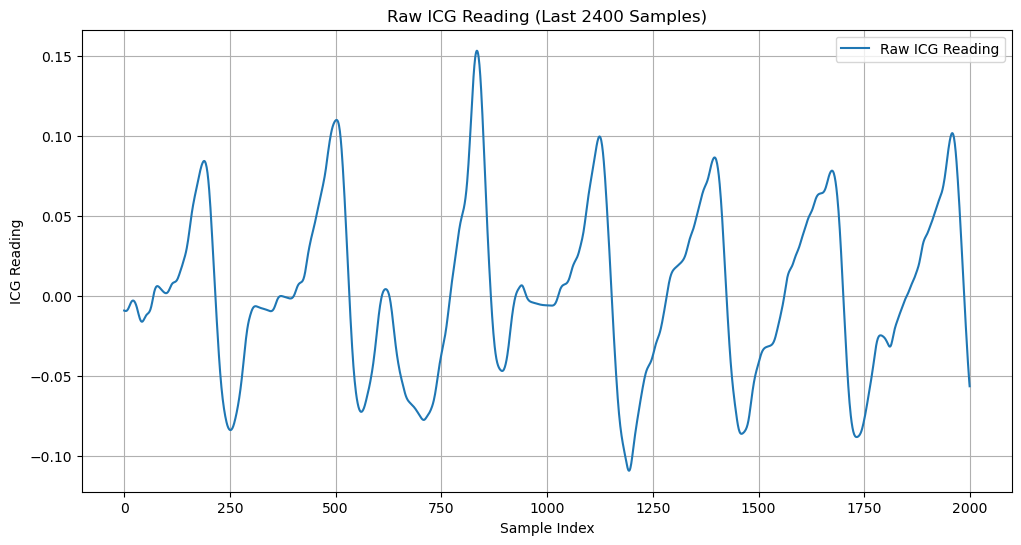

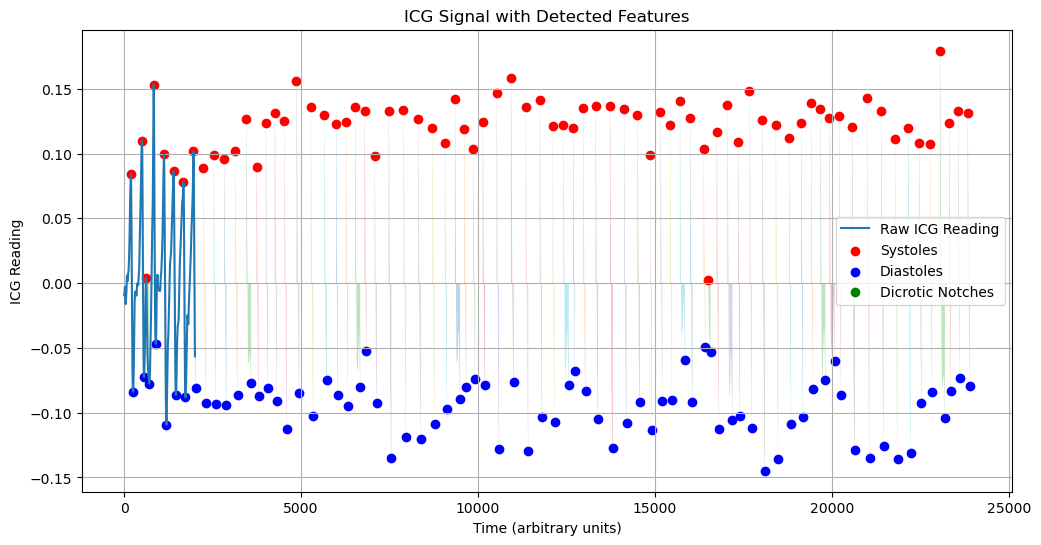

In [169]:
plt.figure(figsize=(12, 6))
plt.plot(cardiac_filtered_data1[:2000], label='Raw ICG Reading')
plt.title('Raw ICG Reading (Last 2400 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)
plt.show()

# Function to detect systole, diastole, and dicrotic notch
def detect_all_features(data, fs=1000):
    # Detect all peaks with lower prominence to ensure detection
    peaks, _ = find_peaks(data, prominence=0.05)
    # Detect all valleys (invert the signal to find valleys as peaks)
    valleys, _ = find_peaks(-data, prominence=0.05)

    if len(peaks) == 0 or len(valleys) == 0:
        print("No peaks or valleys detected. Adjust prominence or check data.")
        return [], [], []

    systoles = []
    diastoles = []
    dicrotic_notches = []

    for peak in peaks:
        # Identify systole (major peak)
        systoles.append(peak)

        # Identify diastole (first major valley after systole)
        diastole_candidates = valleys[valleys > peak]
        if len(diastole_candidates) > 0:
            diastole = diastole_candidates[0]
            diastoles.append(diastole)

            # Identify dicrotic notch (small peak after systole but before diastole)
            dicrotic_candidates = peaks[(peaks > peak) & (peaks < diastole)]
            if len(dicrotic_candidates) > 0:
                dicrotic_notch = dicrotic_candidates[0]
                dicrotic_notches.append(dicrotic_notch)

    return systoles, diastoles, dicrotic_notches

# Function to calculate the area under the curve between systole and diastole
def calculate_auc(data, systole, diastole):
    if systole is not None and diastole is not None:
        auc = np.trapz(data[systole:diastole], dx=1.0)
        return auc
    return None

# Sampling frequency (assuming the data is sampled at 400 Hz, adjust as necessary)
fs = 400.0

# Detect features in the raw data
systoles, diastoles, dicrotic_notches = detect_all_features(cardiac_filtered_data1, fs)

# If features are detected, calculate the AUC and plot the results
if len(systoles) > 0 and len(diastoles) > 0:
    aucs = [calculate_auc(cardiac_filtered_data1, systole, diastole) for systole, diastole in zip(systoles, diastoles)]

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(cardiac_filtered_data1[:2000], label='Raw ICG Reading')
    plt.scatter(systoles, cardiac_filtered_data1[systoles], color='red', label='Systoles')
    plt.scatter(diastoles, cardiac_filtered_data1[diastoles], color='blue', label='Diastoles')
    plt.scatter(dicrotic_notches, cardiac_filtered_data1[dicrotic_notches], color='green', label='Dicrotic Notches')

    for systole, diastole in zip(systoles, diastoles):
        plt.fill_between(np.arange(systole, diastole), cardiac_filtered_data1[systole:diastole], alpha=0.3)

    plt.title('ICG Signal with Detected Features')
    plt.xlabel('Time (arbitrary units)')
    plt.ylabel('ICG Reading')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print the extracted features
    for i, (systole, diastole, dicrotic_notch, auc) in enumerate(zip(systoles, diastoles, dicrotic_notches, aucs)):
        print(f"Cycle {i+1}:")
        print(f"  Systole Index: {systole}, Value: {cardiac_filtered_data1[systole]}")
        print(f"  Diastole Index: {diastole}, Value: {cardiac_filtered_data1[diastole]}")
        print(f"  Dicrotic Notch Index: {dicrotic_notch}, Value: {cardiac_filtered_data1[dicrotic_notch] if dicrotic_notch is not None else 'N/A'}")
        print(f"  Area Under the Curve (AUC): {auc}")
else:
    print("Features could not be detected in the raw data.")
    

# Identiy heart rate (BPM)
# Interbeat distance (Heart rate variability)
# Feducial points 
# Area under the curve (Bottom to bottom)
# Continous wavelet transform

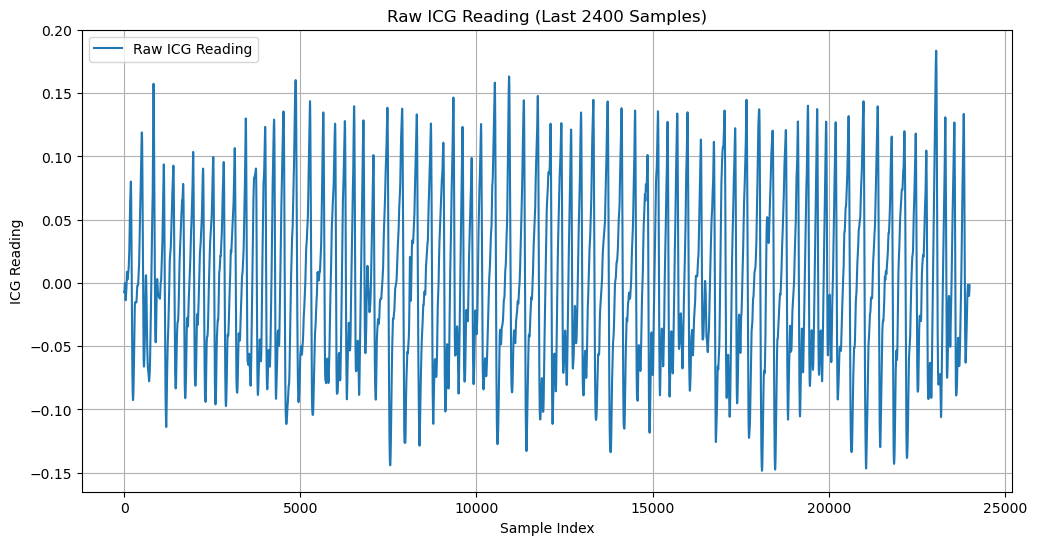

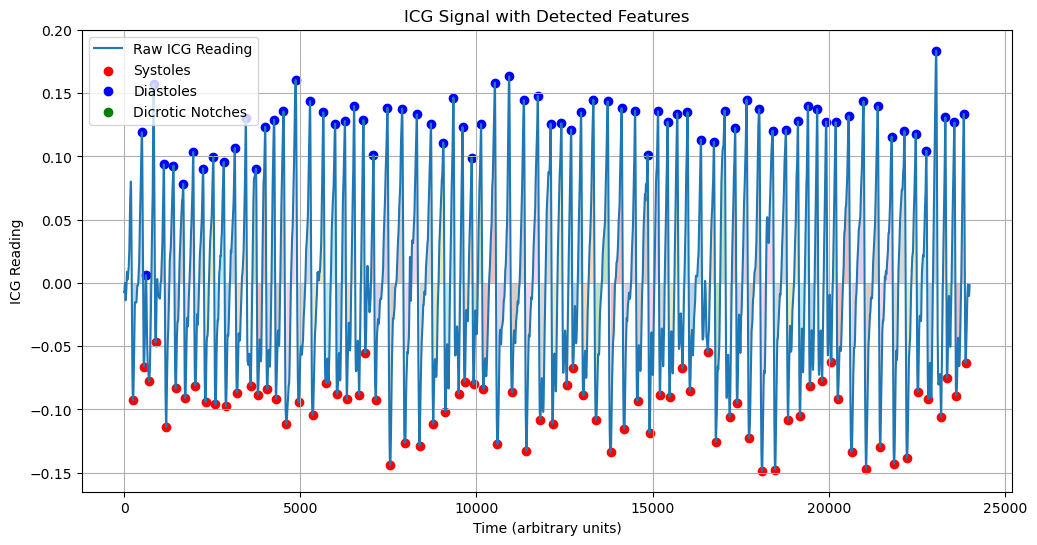

In [117]:
# invering it

plt.figure(figsize=(12, 6))
plt.plot(cardiac_filtered_data1, label='Raw ICG Reading')
plt.title('Raw ICG Reading (Last 2400 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)
plt.show()

# Function to detect systole, diastole, and dicrotic notch
def detect_all_features(data, fs=1000):
    # Detect all peaks with lower prominence to ensure detection
    peaks, _ = find_peaks(-data, prominence=0.05)
    # Detect all valleys (invert the signal to find valleys as peaks)
    valleys, _ = find_peaks(data, prominence=0.05)

    if len(peaks) == 0 or len(valleys) == 0:
        print("No peaks or valleys detected. Adjust prominence or check data.")
        return [], [], []

    systoles = []
    diastoles = []
    dicrotic_notches = []

    for peak in peaks:
        # Identify systole (major peak)
        systoles.append(peak)

        # Identify diastole (first major valley after systole)
        diastole_candidates = valleys[valleys > peak]
        if len(diastole_candidates) > 0:
            diastole = diastole_candidates[0]
            diastoles.append(diastole)

            # Identify dicrotic notch (small peak after systole but before diastole)
            dicrotic_candidates = peaks[(peaks > peak) & (peaks < diastole)]
            if len(dicrotic_candidates) > 0:
                dicrotic_notch = dicrotic_candidates[0]
                dicrotic_notches.append(dicrotic_notch)

    return systoles, diastoles, dicrotic_notches

# Function to calculate the area under the curve between systole and diastole
def calculate_auc(data, systole, diastole):
    if systole is not None and diastole is not None:
        auc = np.trapz(data[systole:diastole], dx=1.0)
        return auc
    return None

# Sampling frequency (assuming the data is sampled at 400 Hz, adjust as necessary)
fs = 400.0

# Detect features in the raw data
systoles, diastoles, dicrotic_notches = detect_all_features(cardiac_filtered_data1, fs)

# If features are detected, calculate the AUC and plot the results
if len(systoles) > 0 and len(diastoles) > 0:
    aucs = [calculate_auc(cardiac_filtered_data1, systole, diastole) for systole, diastole in zip(systoles, diastoles)]

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(cardiac_filtered_data1, label='Raw ICG Reading')
    plt.scatter(systoles, cardiac_filtered_data1[systoles], color='red', label='Systoles')
    plt.scatter(diastoles, cardiac_filtered_data1[diastoles], color='blue', label='Diastoles')
    plt.scatter(dicrotic_notches, cardiac_filtered_data1[dicrotic_notches], color='green', label='Dicrotic Notches')

    for systole, diastole in zip(systoles, diastoles):
        plt.fill_between(np.arange(systole, diastole), cardiac_filtered_data1[systole:diastole], alpha=0.3)

    plt.title('ICG Signal with Detected Features')
    plt.xlabel('Time (arbitrary units)')
    plt.ylabel('ICG Reading')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print the extracted features
    for i, (systole, diastole, dicrotic_notch, auc) in enumerate(zip(systoles, diastoles, dicrotic_notches, aucs)):
        print(f"Cycle {i+1}:")
        print(f"  Systole Index: {systole}, Value: {cardiac_filtered_data1[systole]}")
        print(f"  Diastole Index: {diastole}, Value: {cardiac_filtered_data1[diastole]}")
        print(f"  Dicrotic Notch Index: {dicrotic_notch}, Value: {cardiac_filtered_data1[dicrotic_notch] if dicrotic_notch is not None else 'N/A'}")
        print(f"  Area Under the Curve (AUC): {auc}")
else:
    print("Features could not be detected in the raw data.")

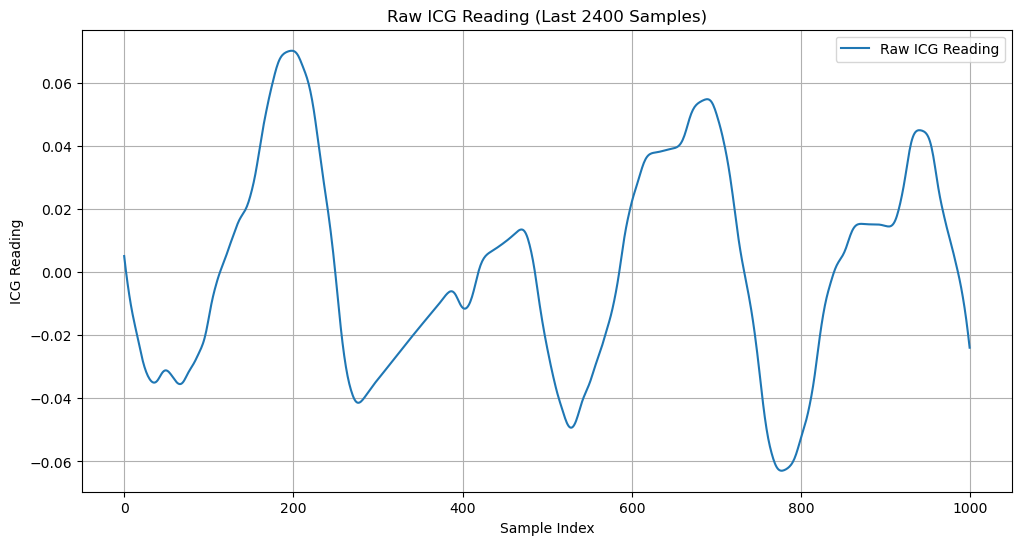

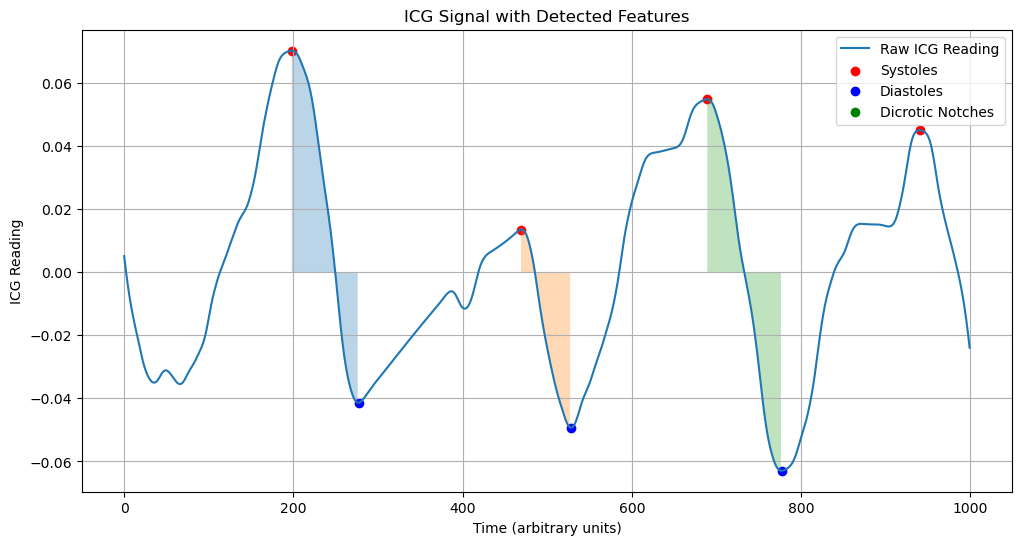

In [28]:
# trying on fifferent data 

data_temp = cardiac_filtered_data5[5000:6000]

plt.figure(figsize=(12, 6))
plt.plot(data_temp, label='Raw ICG Reading')
plt.title('Raw ICG Reading (Last 2400 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)
plt.show()

# Function to detect systole, diastole, and dicrotic notch
def detect_all_features(data, fs=1000):
    # Detect all peaks with lower prominence to ensure detection
    peaks, _ = find_peaks(data, prominence=0.05)
    # Detect all valleys (invert the signal to find valleys as peaks)
    valleys, _ = find_peaks(-data, prominence=0.05)

    if len(peaks) == 0 or len(valleys) == 0:
        print("No peaks or valleys detected. Adjust prominence or check data.")
        return [], [], []

    systoles = []
    diastoles = []
    dicrotic_notches = []

    for peak in peaks:
        # Identify systole (major peak)
        systoles.append(peak)

        # Identify diastole (first major valley after systole)
        diastole_candidates = valleys[valleys > peak]
        if len(diastole_candidates) > 0:
            diastole = diastole_candidates[0]
            diastoles.append(diastole)

            # Identify dicrotic notch (small peak after systole but before diastole)
            dicrotic_candidates = peaks[(peaks > peak) & (peaks < diastole)]
            if len(dicrotic_candidates) > 0:
                dicrotic_notch = dicrotic_candidates[0]
                dicrotic_notches.append(dicrotic_notch)

    return systoles, diastoles, dicrotic_notches

# Function to calculate the area under the curve between systole and diastole
def calculate_auc(data, systole, diastole):
    if systole is not None and diastole is not None:
        auc = np.trapz(data[systole:diastole], dx=1.0)
        return auc
    return None

# Sampling frequency (assuming the data is sampled at 400 Hz, adjust as necessary)
fs = 400.0

# Detect features in the raw data
systoles, diastoles, dicrotic_notches = detect_all_features(data_temp, fs)

# If features are detected, calculate the AUC and plot the results
if len(systoles) > 0 and len(diastoles) > 0:
    aucs = [calculate_auc(data_temp, systole, diastole) for systole, diastole in zip(systoles, diastoles)]

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(data_temp, label='Raw ICG Reading')
    plt.scatter(systoles, data_temp[systoles], color='red', label='Systoles')
    plt.scatter(diastoles, data_temp[diastoles], color='blue', label='Diastoles')
    plt.scatter(dicrotic_notches, data_temp[dicrotic_notches], color='green', label='Dicrotic Notches')

    for systole, diastole in zip(systoles, diastoles):
        plt.fill_between(np.arange(systole, diastole), data_temp[systole:diastole], alpha=0.3)

    plt.title('ICG Signal with Detected Features')
    plt.xlabel('Time (arbitrary units)')
    plt.ylabel('ICG Reading')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print the extracted features
    for i, (systole, diastole, dicrotic_notch, auc) in enumerate(zip(systoles, diastoles, dicrotic_notches, aucs)):
        print(f"Cycle {i+1}:")
        print(f"  Systole Index: {systole}, Value: {data_temp[systole]}")
        print(f"  Diastole Index: {diastole}, Value: {data_temp[diastole]}")
        print(f"  Dicrotic Notch Index: {dicrotic_notch}, Value: {data_temp[dicrotic_notch] if dicrotic_notch is not None else 'N/A'}")
        print(f"  Area Under the Curve (AUC): {auc}")
else:
    print("Features could not be detected in the raw data.")

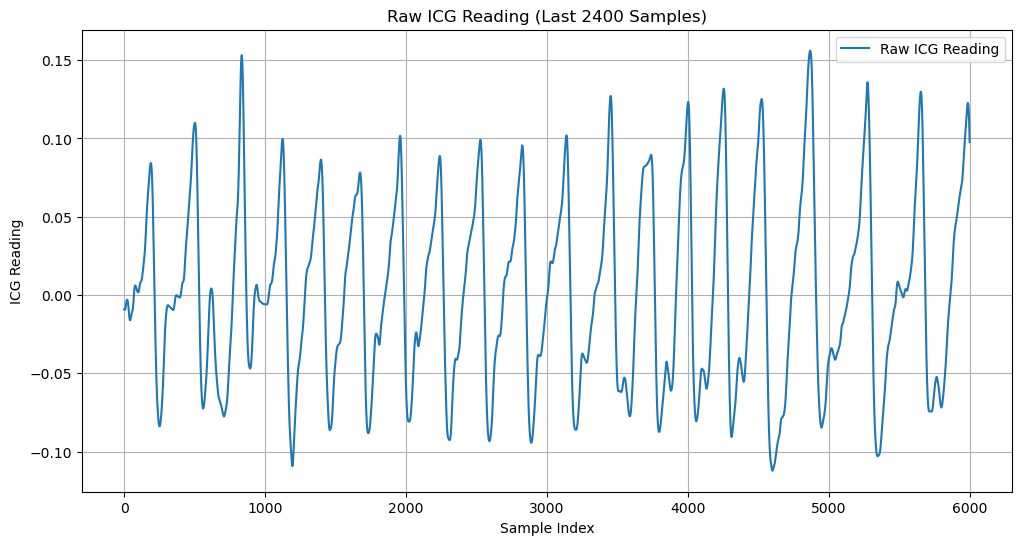

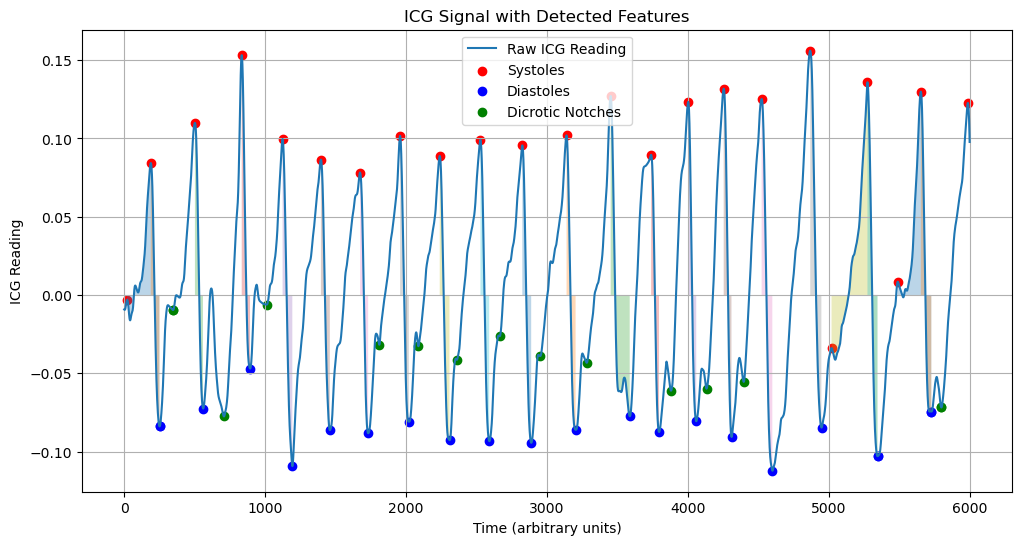

  Heart rate: 23


In [52]:
data_temp = cardiac_filtered_data1[:6000]

plt.figure(figsize=(12, 6))
plt.plot(data_temp, label='Raw ICG Reading')
plt.title('Raw ICG Reading (Last 2400 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)
plt.show()

# Function to detect systole, diastole, and dicrotic notch
def detect_all_features(data, fs=1000):
    # Detect all peaks with lower prominence to ensure detection
    peaks, _ = find_peaks(data, distance=150)
    # Detect all valleys (invert the signal to find valleys as peaks)
    valleys, _ = find_peaks(-data, prominence=0.05)

    if len(peaks) == 0 or len(valleys) == 0:
        print("No peaks or valleys detected. Adjust prominence or check data.")
        return [], [], []

    systoles = []
    diastoles = []
    dicrotic_notches = []

    for peak in peaks:
        # Identify systole (major peak)
        systoles.append(peak)

        # Identify diastole (first major valley after systole)
        diastole_candidates = valleys[valleys > peak]
        if len(diastole_candidates) > 0:
            diastole = diastole_candidates[0]
            diastoles.append(diastole)

            # Identify next systole
            next_systole_candidates = peaks[peaks > diastole]
            if len(next_systole_candidates) > 0:
                next_systole = next_systole_candidates[0]

                # Identify dicrotic notch (local minima between diastole and next systole)
                local_minima, _ = find_peaks(-data[diastole:next_systole])
                if len(local_minima) > 0:
                    dicrotic_candidate = local_minima[0] + diastole
                    dicrotic_notches.append(dicrotic_candidate)
                else:
                    dicrotic_notches.append(None)
            else:
                dicrotic_notches.append(None)
        else:
            dicrotic_notches.append(None)

    return systoles, diastoles, dicrotic_notches

# Function to calculate the area under the curve between systole and diastole
def calculate_auc(data, systole, diastole):
    if systole is not None and diastole is not None:
        auc = np.trapz(data[systole:diastole], dx=1.0)
        return auc
    return None

# Sampling frequency (assuming the data is sampled at 400 Hz, adjust as necessary)
fs = 400.0

# Detect features in the raw data
systoles, diastoles, dicrotic_notches = detect_all_features(data_temp, fs)

# If features are detected, calculate the AUC and plot the results
if len(systoles) > 0 and len(diastoles) > 0:
    aucs = [calculate_auc(data_temp, systole, diastole) for systole, diastole in zip(systoles, diastoles)]

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(data_temp, label='Raw ICG Reading')
    plt.scatter(systoles, data_temp[systoles], color='red', label='Systoles')
    plt.scatter(diastoles, data_temp[diastoles], color='blue', label='Diastoles')
    dicrotic_notches_valid = [dn for dn in dicrotic_notches if dn is not None]
    plt.scatter(dicrotic_notches_valid, data_temp[dicrotic_notches_valid], color='green', label='Dicrotic Notches')

    for systole, diastole in zip(systoles, diastoles):
        plt.fill_between(np.arange(systole, diastole), data_temp[systole:diastole], alpha=0.3)

    plt.title('ICG Signal with Detected Features')
    plt.xlabel('Time (arbitrary units)')
    plt.ylabel('ICG Reading')
    plt.legend()
    plt.grid(True)
    plt.show()


    print(f"  Heart rate: {len(systoles)}")

    # Print the extracted features
    # for i, (systole, diastole, dicrotic_notch, auc) in enumerate(zip(systoles, diastoles, dicrotic_notches, aucs)):
    #     print(f"Cycle {i+1}:")
    #     print(f"  Systole Index: {systole}, Value: {data_temp[systole]}")
    #     print(f"  Diastole Index: {diastole}, Value: {data_temp[diastole]}")
    #     print(f"  Dicrotic Notch Index: {dicrotic_notch}, Value: {data_temp[dicrotic_notch] if dicrotic_notch is not None else 'N/A'}")
    #     print(f"  Area Under the Curve (AUC): {auc}")
else:
    print("Features could not be detected in the raw data.")
# print(dicrotic_notches_valid)
# print(diastoles)
# print(systoles)

In [34]:
# Function to detect systole, diastole, and dicrotic notch
def detect_all_features(data, fs=1000):
    # Detect all peaks with lower prominence to ensure detection
    peaks, _ = find_peaks(data, prominence=0.05)
    # Detect all valleys (invert the signal to find valleys as peaks)
    valleys, _ = find_peaks(-data, prominence=0.05)

    if len(peaks) == 0 or len(valleys) == 0:
        print("No peaks or valleys detected. Adjust prominence or check data.")
        return [], [], []

    systoles = []
    diastoles = []
    dicrotic_notches = []

    for peak in peaks:
        # Identify systole (major peak)
        systoles.append(peak)

        # Identify diastole (first major valley after systole)
        diastole_candidates = valleys[valleys > peak]
        if len(diastole_candidates) > 0:
            diastole = diastole_candidates[0]
            diastoles.append(diastole)

            # Identify dicrotic notch (small peak after diastole but before next systole)
            next_systole_candidates = peaks[peaks > diastole]
            if len(next_systole_candidates) > 0:
                next_systole = next_systole_candidates[0]
                dicrotic_candidates = peaks[(peaks > diastole) & (peaks < next_systole)]
                if len(dicrotic_candidates) > 0:
                    dicrotic_notch = dicrotic_candidates[0]
                    dicrotic_notches.append(dicrotic_notch)
                else:
                    dicrotic_notches.append(None)
            else:
                dicrotic_notches.append(None)

    return systoles, diastoles, dicrotic_notches

# Function to calculate the area under the curve between systole and diastole
def calculate_auc(data, systole, diastole):
    if systole is not None and diastole is not None:
        auc = np.trapz(data[systole:diastole], dx=1.0)
        return auc
    return None

# Sampling frequency (assuming the data is sampled at 400 Hz, adjust as necessary)
fs = 400.0

# Detect features in the raw data
systoles, diastoles, dicrotic_notches = detect_all_features(data_temp, fs)
dicrotic_notches

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

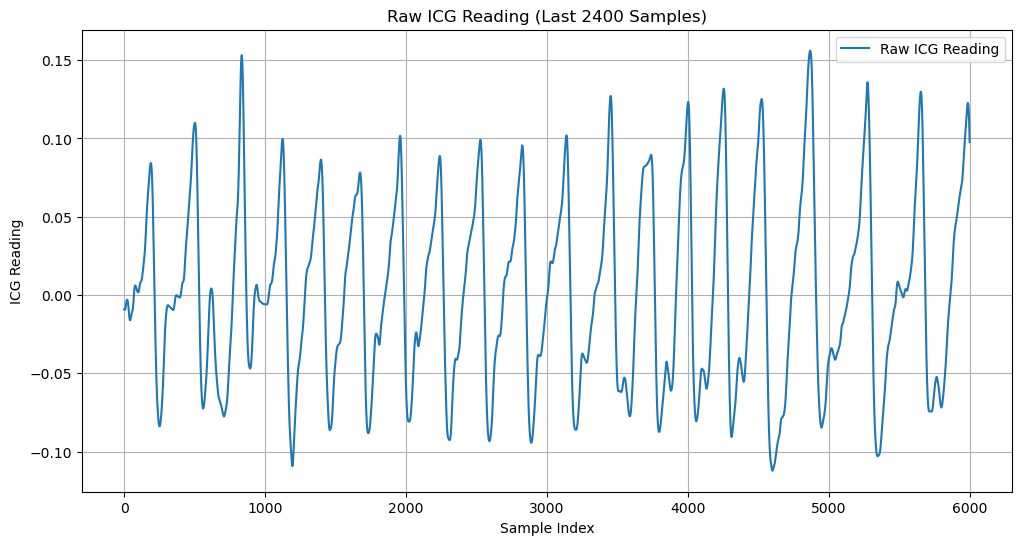

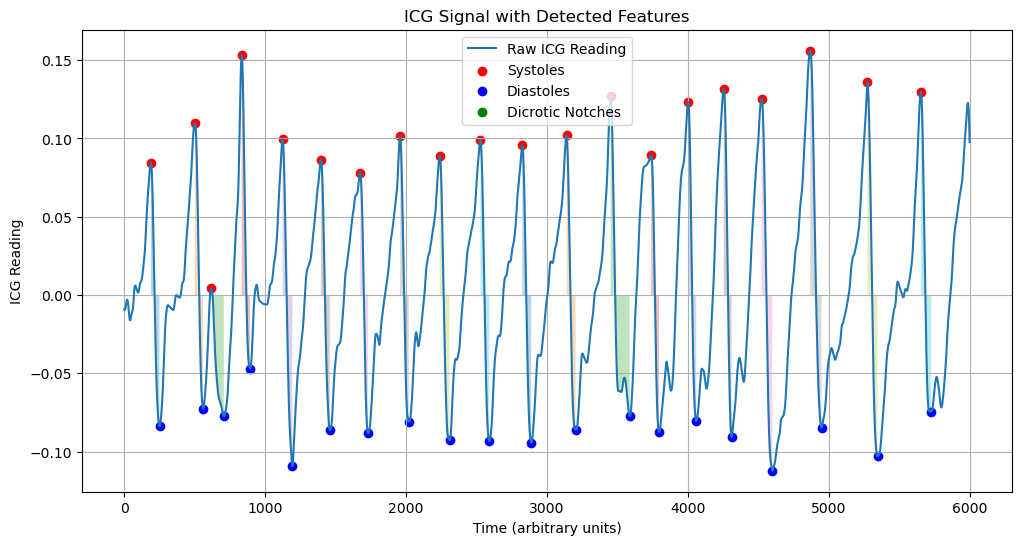

Cycle 1:
  Systole Index: 189, Value: 0.08425346187215828
  Diastole Index: 251, Value: -0.08390116414156534
  Dicrotic Notch Index: None, Value: N/A
  Area Under the Curve (AUC): -0.4933280739361564
Cycle 2:
  Systole Index: 502, Value: 0.10988479111744741
  Diastole Index: 560, Value: -0.07249987365652973
  Dicrotic Notch Index: None, Value: N/A
  Area Under the Curve (AUC): 0.8577615847909896
Cycle 3:
  Systole Index: 618, Value: 0.004151017539841297
  Diastole Index: 708, Value: -0.07756642195999958
  Dicrotic Notch Index: None, Value: N/A
  Area Under the Curve (AUC): -4.254324764542914
Cycle 4:
  Systole Index: 834, Value: 0.15313980277260997
  Diastole Index: 894, Value: -0.046976062308507406
  Dicrotic Notch Index: None, Value: N/A
  Area Under the Curve (AUC): 2.013764860084586
Cycle 5:
  Systole Index: 1124, Value: 0.09954232811798597
  Diastole Index: 1194, Value: -0.10931684464653223
  Dicrotic Notch Index: None, Value: N/A
  Area Under the Curve (AUC): -1.0913698858707495


In [29]:
# trying on fifferent data 

data_temp = cardiac_filtered_data1[:6000]

plt.figure(figsize=(12, 6))
plt.plot(data_temp, label='Raw ICG Reading')
plt.title('Raw ICG Reading (Last 2400 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)
plt.show()

# Function to detect systole, diastole, and dicrotic notch
def detect_all_features(data, fs=1000):
    # Detect all peaks with lower prominence to ensure detection
    peaks, _ = find_peaks(data, prominence=0.05)
    # Detect all valleys (invert the signal to find valleys as peaks)
    valleys, _ = find_peaks(-data, prominence=0.05)

    if len(peaks) == 0 or len(valleys) == 0:
        print("No peaks or valleys detected. Adjust prominence or check data.")
        return [], [], []

    systoles = []
    diastoles = []
    dicrotic_notches = []

    for peak in peaks:
        # Identify systole (major peak)
        systoles.append(peak)

        # Identify diastole (first major valley after systole)
        diastole_candidates = valleys[valleys > peak]
        if len(diastole_candidates) > 0:
            diastole = diastole_candidates[0]
            diastoles.append(diastole)

            # Identify dicrotic notch (small peak after diastole but before next systole)
            next_systole_candidates = peaks[peaks > diastole]
            if len(next_systole_candidates) > 0:
                next_systole = next_systole_candidates[0]
                dicrotic_candidates = peaks[(peaks > diastole) & (peaks < next_systole)]
                if len(dicrotic_candidates) > 0:
                    dicrotic_notch = dicrotic_candidates[0]
                    dicrotic_notches.append(dicrotic_notch)
                else:
                    dicrotic_notches.append(None)
            else:
                dicrotic_notches.append(None)

    return systoles, diastoles, dicrotic_notches

# Function to calculate the area under the curve between systole and diastole
def calculate_auc(data, systole, diastole):
    if systole is not None and diastole is not None:
        auc = np.trapz(data[systole:diastole], dx=1.0)
        return auc
    return None

# Sampling frequency (assuming the data is sampled at 400 Hz, adjust as necessary)
fs = 400.0

# Detect features in the raw data
systoles, diastoles, dicrotic_notches = detect_all_features(data_temp, fs)

# Filter out None values from dicrotic_notches
valid_dicrotic_notches = [dn for dn in dicrotic_notches if dn is not None]

# If features are detected, calculate the AUC and plot the results
if len(systoles) > 0 and len(diastoles) > 0:
    aucs = [calculate_auc(data_temp, systole, diastole) for systole, diastole in zip(systoles, diastoles)]

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(data_temp, label='Raw ICG Reading')
    plt.scatter(systoles, data_temp[systoles], color='red', label='Systoles')
    plt.scatter(diastoles, data_temp[diastoles], color='blue', label='Diastoles')
    plt.scatter(valid_dicrotic_notches, data_temp[valid_dicrotic_notches], color='green', label='Dicrotic Notches')

    for systole, diastole in zip(systoles, diastoles):
        plt.fill_between(np.arange(systole, diastole), data_temp[systole:diastole], alpha=0.3)

    plt.title('ICG Signal with Detected Features')
    plt.xlabel('Time (arbitrary units)')
    plt.ylabel('ICG Reading')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print the extracted features
    for i, (systole, diastole, dicrotic_notch, auc) in enumerate(zip(systoles, diastoles, dicrotic_notches, aucs)):
        print(f"Cycle {i+1}:")
        print(f"  Systole Index: {systole}, Value: {data_temp[systole]}")
        print(f"  Diastole Index: {diastole}, Value: {data_temp[diastole]}")
        print(f"  Dicrotic Notch Index: {dicrotic_notch}, Value: {data_temp[dicrotic_notch] if dicrotic_notch is not None else 'N/A'}")
        print(f"  Area Under the Curve (AUC): {auc}")
else:
    print("Features could not be detected in the raw data.")



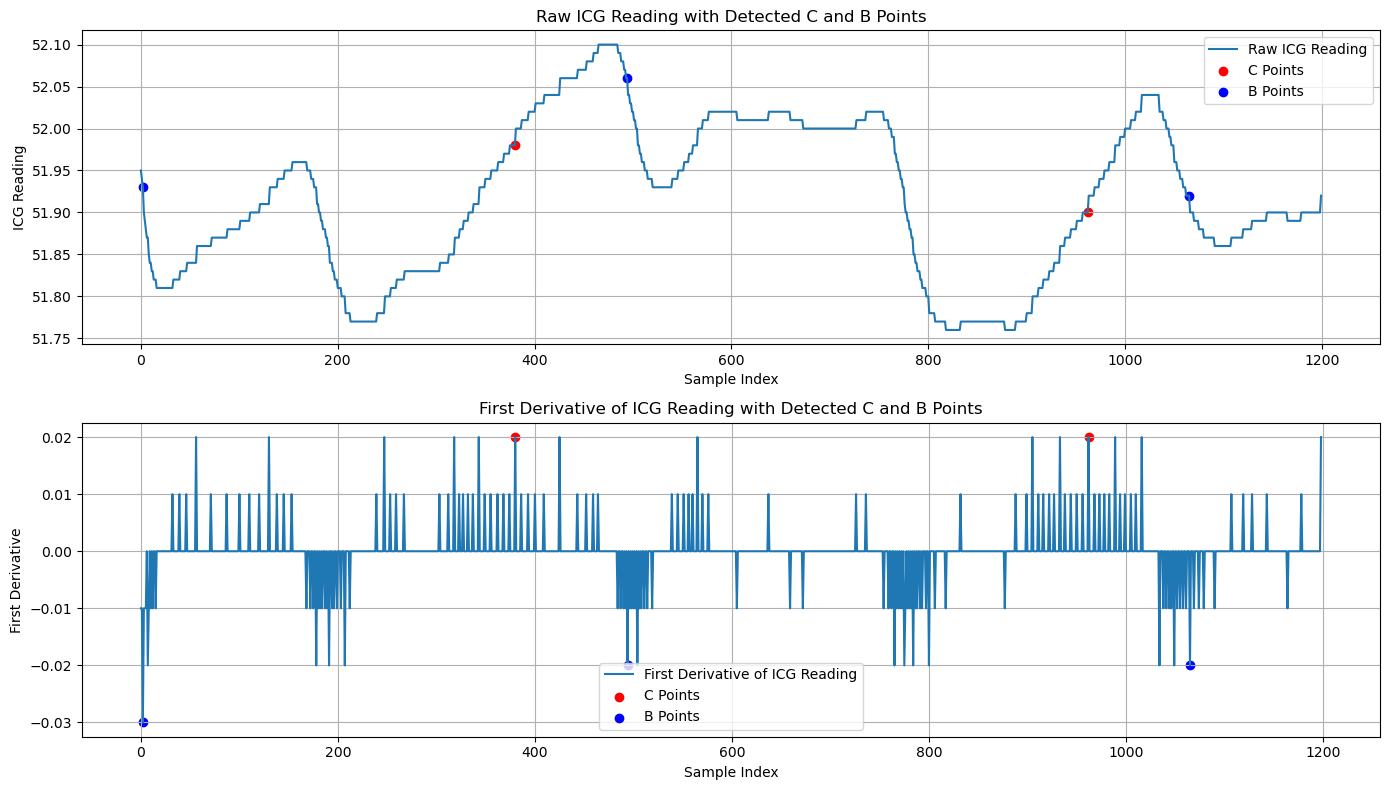

In [133]:

raw_data_temp = np.array(data1["raw_data"][100:1300])

# Calculate the first derivative of the ICG signal
first_derivative = np.diff(raw_data_temp)

# Detect peaks (C points) in the first derivative
c_points, _ = find_peaks(first_derivative, distance=400)

# Detect troughs (B points) in the first derivative
b_points, _ = find_peaks(-first_derivative, distance=400)

# Plot the raw data and the first derivative with detected points
plt.figure(figsize=(14, 8))

# Plot raw ICG data
plt.subplot(2, 1, 1)
plt.plot(raw_data_temp, label='Raw ICG Reading')
plt.scatter(c_points, raw_data_temp[c_points], color='red', label='C Points')
plt.scatter(b_points, raw_data_temp[b_points], color='blue', label='B Points')
plt.title('Raw ICG Reading with Detected C and B Points')
plt.xlabel('Sample Index')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

# Plot first derivative of ICG data
plt.subplot(2, 1, 2)
plt.plot(first_derivative, label='First Derivative of ICG Reading')
plt.scatter(c_points, first_derivative[c_points], color='red', label='C Points')
plt.scatter(b_points, first_derivative[b_points], color='blue', label='B Points')
plt.title('First Derivative of ICG Reading with Detected C and B Points')
plt.xlabel('Sample Index')
plt.ylabel('First Derivative')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Use the filtered data 


In [ ]:
ip install pyPPG